#  **International Passenger and US Air-Traffic Analysis**
Contributors: Aaryan Bammi, Chaitali Deshmukh, Crystal Leatvanich, Junhan Chen (Project Manager), Kuang-Ching (Amanda) Ting, Saketh Bollina

# **1. Executive Summary**

This project provides a detailed analysis of international passenger and U.S. air traffic trends to guide airlines in strategic decision-making. Using datasets from the U.S. Department of Transportation’s “U.S. Airline Traffic by Airport” and “International Passenger Report,” we examined passenger volumes, freight trends, and seasonal demand patterns over the past decade. The findings highlight steady passenger growth, with significant declines during major global events like the COVID-19 pandemic, which saw a 73.8% drop in 2020. Seasonal peaks were observed in the second and third quarters, driven by vacations and holidays, with high-demand routes such as JFK to London Heathrow (LHR) and Paris Charles de Gaulle (CDG). Freight volumes, meanwhile, showed consistent growth, surging during the pandemic due to increased e-commerce activity. Major hubs like Los Angeles (LAX), Chicago O’Hare (ORD), and San Francisco (SFO) dominated international travel, while American Airlines (AA) and United Airlines (UA) led market shares on key routes. This analysis offers actionable insights to optimize flight schedules, manage resources effectively, and enhance adaptability to dynamic market demands, ensuring airlines remain competitive and customer-focused in a rapidly changing industry.


# **2. Introduction And Motivation**

The airline industry is constantly changing, due to fluctuating demand, economic pressures, and global events. This project aims to showcase how robust data analysis can empower airlines to make informed decisions. By examining patterns in passenger and freight traffic, our goal is to help airlines optimize their flight schedules, allocate resources effectively, and adapt to market dynamics. This project provides a practical application of analytical skills in a real-world context, addressing challenges faced by airlines to remain competitive in a fast-paced and data-driven industry. Insights into seasonal demand and high-demand routes highlight opportunities for strategic improvements that align with customer expectations and operational needs.

# **3. Data Source**


### 3-1. [**U.S. Airline Traffic By Airport**](https://www.bts.gov/browse-statistical-products-and-data/state-transportation-statistics/us-airline-traffic-airport)


**U.S. Airline Traffic by Airport** - This dataset includes all U.S. states and territories, providing details on each airport's passenger volumes and freight tonnage across multiple years. In this analysis, we focused on five major states to gain a broader understanding of the industry: California, Alaska, Illinois, Massachusetts, and Georgia.

| **Column Name**   | **Description**                                                                                             |
|--------------------|-------------------------------------------------------------------------------------------------------------|
| State              | The U.S. State where the airport is located.                                                                |
| City               | The city where the airport is located.                                                                      |
| Airport            | The official name of the airport.                                                                           |
| Code               | The airport's unique identifier, typically its IATA code.                                                   |
| Year               | The year the data is from.                                                                                  |
| Measure Name       | A type of measure: Passenger (# of passengers), Freight Tons (weight of freight cargo), or Mail Tons.        |
| Measure Values     | The values corresponding to Passenger, Freight Tons, or Mail Tons (measured in tons).                       |

---
*Source : Bureau of Transportation Statistics* <br>

### 3-2. [**U.S. & International Passenger Report**](https://data.transportation.gov/Aviation/International_Report_Passengers/xgub-n9bw/about_data)

**International Report Passengers** - This dataset includes all nonstop commercial passenger traffic between international destinations and U.S. airports starting from 2012.

---
| **Column Name**     | **Description**                                                                                           |
|---------------------|-----------------------------------------------------------------------------------------------------------|
| data_dte            | The exact date when the data was recorded.                                                                |
| Year                | The calendar year in which the flight activity took place.                                                |
| Month               | The month within the year when the data was collected.                                                    |
| usg_apt_id          | A unique identifier (numeric) for the U.S. airport in the dataset.                                        |
| usg_apt             | The unique identifier (IATA code- 3 letters) representing the U.S. airport involved in the flight.         |
| usg_wac             | The World Area Code for the U.S. airport location, representing its geographic area.                      |
| fg_apt_id           | A unique identifier (numeric) for the foreign (non-U.S.) airport in the dataset.                          |
| fg_apt              | The unique identifier (IATA code- 3 letters) representing the foreign (non-U.S.) airport involved.        |
| fg_wac              | The World Area Code for the foreign airport location.                                                     |
| airlineid           | A unique identifier (numeric) for the airline operating the flight.                                       |
| carrier             | A unique identifier (2 letter code) for the airline operating the flight.                                 |
| carriergroup        | The classification of the carrier: 1 is U.S. domestic carrier and 0 is foreign carriers.                  |
| type                | Specifies the flight type, such as scheduled or chartered service.                                        |
| Scheduled           | Metric flown by scheduled service operations.                                                             |
| Charter             | Metric flown by charter operations.                                                                       |
| Total               | Total metric flown by scheduled service and charter operations.                                           |

---


*Source: U.S. Department of Transportation*

# **4. Entity Relationship Diagram**

This ERD illustrates the relationship between the combined_usa_dataset table and the intl_passengers_report table. The two tables are connected through a common key, where the Code field from the combined_usa_dataset corresponds to the usg_apt field in the intl_passengers_report. This connection allows the two datasets to be integrated, linking U.S. airport information with international flight details. The relationship between the two tables is optional, which means that a U.S. airport listed in the combined_usa_dataset may have zero, one, or many associated flights to foreign airports, as captured in the intl_passengers_report. Similarly, a foreign airport involved in international flights may appear zero, one, or many times in the dataset.


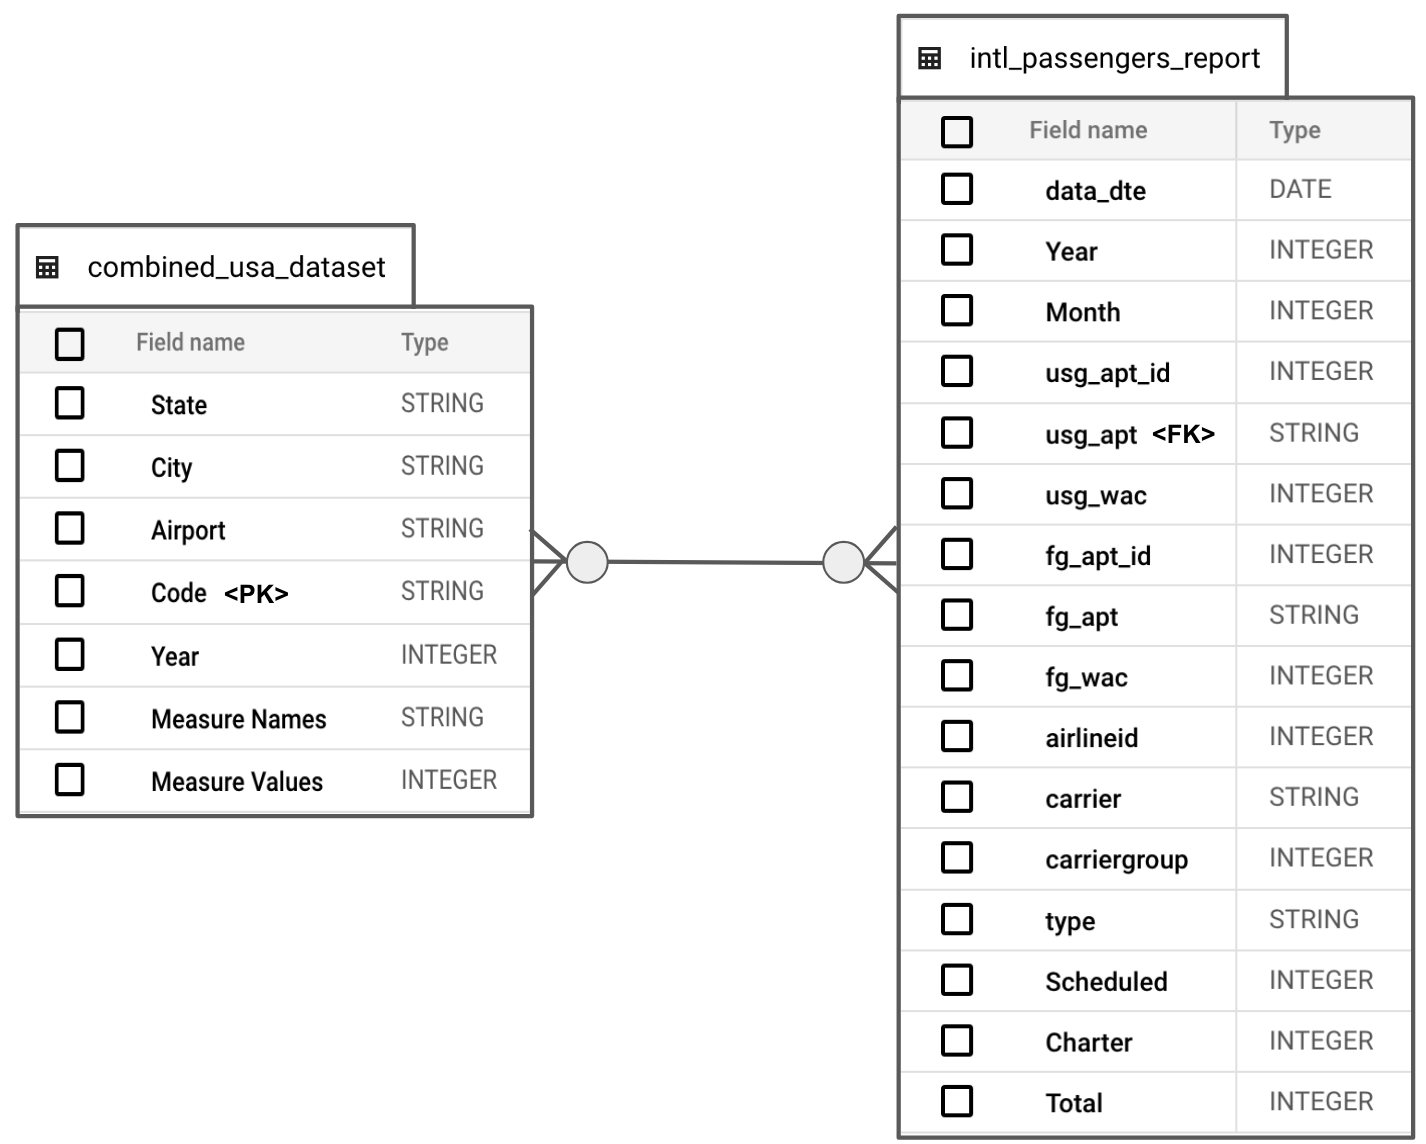

# **5. Database Setup**

In [ ]:
# Authenticate the user
from google.colab import auth
auth.authenticate_user()

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Load the BigQuery magic commands
%load_ext google.cloud.bigquery

In [ ]:
# Add the correct source list for gcsfuse
!echo "deb https://packages.cloud.google.com/apt gcsfuse-$(lsb_release -c -s) main" | sudo tee /etc/apt/sources.list.d/gcsfuse.list

# Import the Google Cloud public key
!curl https://packages.cloud.google.com/apt/doc/apt-key.gpg | sudo apt-key add -

# Update package list and install gcsfuse
!sudo apt-get update
!sudo apt-get install gcsfuse

deb https://packages.cloud.google.com/apt gcsfuse-jammy main
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1022  100  1022    0     0   5911      0 --:--:-- --:--:-- --:--:--  5941
OK
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://packages.cloud.google.com/apt gcsfuse-jammy InRelease [1,227 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 https://packages.cloud.google.com/apt gcsfuse-jammy/main all Packages [750 B]
Get:9 https://packages.cloud.google.com/apt gcsfuse-jammy/main amd64 Packages [2

In [ ]:
!mkdir travel
!gcsfuse --implicit-dirs ba775-b04 travel

{"timestamp":{"seconds":1733347514,"nanos":942906971},"severity":"INFO","message":"Start gcsfuse/2.5.1 (Go version go1.23.0) for app \"\" using mount point: /content/travel\n"}
{"timestamp":{"seconds":1733347514,"nanos":942982148},"severity":"INFO","message":"GCSFuse config","config":{"AppName":"","CacheDir":"","Debug":{"ExitOnInvariantViolation":false,"Fuse":false,"Gcs":false,"LogMutex":false},"EnableHns":true,"FileCache":{"CacheFileForRangeRead":false,"DownloadChunkSizeMb":50,"EnableCrc":false,"EnableODirect":false,"EnableParallelDownloads":false,"MaxParallelDownloads":16,"MaxSizeMb":-1,"ParallelDownloadsPerFile":16,"WriteBufferSize":4194304},"FileSystem":{"DirMode":"755","DisableParallelDirops":false,"FileMode":"644","FuseOptions":[],"Gid":-1,"IgnoreInterrupts":true,"KernelListCacheTtlSecs":0,"RenameDirLimit":0,"TempDir":"","Uid":-1},"Foreground":false,"GcsAuth":{"AnonymousAccess":false,"KeyFile":"","ReuseTokenFromUrl":true,"TokenUrl":""},"GcsConnection":{"BillingProject":"","Client

# **6. Data Cleaning**

**1. Data Collection and Consolidation**

In [ ]:
# We analyzed U.S. airline traffic data from five key states (Alaska, California, Georgia, Illinois, Massachusetts) due to their high passenger and freight volumes. Data from the last decade was combined into a single dataset (Combined_Airport_Data_SQL) using UNION ALL, preserving all records for further analysis.
%%bigquery --project=ba775-team-4

CREATE OR REPLACE TABLE `ba775_b04.Combined_Airport_Data_SQL` AS
SELECT * FROM `6state_airport_datasets`.`Alaska`
UNION ALL
SELECT * FROM `6state_airport_datasets`.`California`
UNION ALL
SELECT * FROM `6state_airport_datasets`.`Georgia`
UNION ALL
SELECT * FROM `6state_airport_datasets`.`Illinois`
UNION ALL
SELECT * FROM `6state_airport_datasets`.`Massachusetts`
;

Query is running:   0%|          |

""


We analyzed U.S. airline traffic data from five key states (Alaska, California, Georgia, Illinois, Massachusetts) due to their high passenger and freight volumes. Data from the last decade was combined into a single dataset (Combined_Airport_Data_SQL) using UNION ALL, preserving all records for further analysis.

**2. Verifying Null Values Across All Columns**

In [ ]:
# To ensure data quality, we identified NULL values in the Airport column and systematically checked for missing data in other columns (State, City, Code, Year, Measure Names, Measure Values) using SELECT queries with WHERE [column_name] IS NULL. This thorough approach confirmed the dataset's completeness.
%%bigquery --project=ba775-team-4
SELECT *
FROM `ba775-team-4.ba775_b04.Combined_Airport_Data_SQL`
WHERE state IS NULL
   OR city IS NULL
   OR code IS NULL
   OR year IS NULL
   OR `Measure Names` IS NULL
   OR `Measure Values` IS NULL;

Query is running:   0%|          |

Downloading: |          |

,State,City,Airport,Code,Year,Measure Names,Measure Values


To ensure data quality, we identified NULL values in the Airport column and systematically checked for missing data in other columns (State, City, Code, Year, Measure Names, Measure Values) using SELECT queries with WHERE [column_name] IS NULL. This thorough approach confirmed the dataset's completeness.

**3. Identifying Null Values in the Airport Column**

In [ ]:
%%bigquery --project=ba775-team-4
SELECT *
FROM `ba775-team-4.ba775_b04.Combined_Airport_Data_SQL`
WHERE Airport IS NULL;

Query is running:   0%|          |

Downloading: |          |

,State,City,Airport,Code,Year,Measure Names,Measure Values


**4. Replace Null Value in Airport with 'unknown'**


In [ ]:
%%bigquery --project=ba775-team-4
UPDATE `ba775-team-4.ba775_b04.Combined_Airport_Data_SQL`
SET Airport = 'unknown'
WHERE Airport IS NULL;

Query is running:   0%|          |

""


**5. Display the Cleaned Table**

In [ ]:
%%bigquery --project=ba775-team-4
SELECT *
FROM `ba775-team-4.ba775_b04.Combined_Airport_Data_SQL`
LIMIT 100;

Query is running:   0%|          |

Downloading:   0%|          |

,State,City,Airport,Code,Year,Measure Names,Measure Values
0,Alaska,Little Squaw,Little Squaw Airport,05A,2020,Mail tons,0
1,Alaska,Little Squaw,Little Squaw Airport,05A,2017,Mail tons,0
2,Alaska,Little Squaw,Little Squaw Airport,05A,2022,Mail tons,0
3,Alaska,Little Squaw,Little Squaw Airport,05A,2015,Mail tons,0
4,Alaska,Little Squaw,Little Squaw Airport,05A,2014,Mail tons,0
...,...,...,...,...,...,...,...
95,Alaska,Kodiak,Kodiak Airport,ADQ,2014,Mail tons,22
96,Alaska,Kodiak,Kodiak Airport,ADQ,2020,Mail tons,3
97,Alaska,Kodiak,Kodiak Airport,ADQ,2019,Mail tons,15
98,Alaska,Kodiak,Kodiak Airport,ADQ,2022,Mail tons,0


**6. Get Summary Information About the Data**

In [ ]:
%%bigquery --project=ba775-team-4
SELECT
    COUNT(*) AS total_rows,
    COUNT(DISTINCT Airport) AS distinct_airports,
    COUNTIF(Airport IS NULL) AS null_airport_count,
    COUNT(DISTINCT State) AS distinct_states,
    COUNTIF(State IS NULL) AS null_state_count,
    COUNT(DISTINCT City) AS distinct_cities,
    COUNTIF(City IS NULL) AS null_city_count,
    COUNT(DISTINCT Code) AS distinct_codes,
    COUNTIF(Code IS NULL) AS null_code_count,
    COUNT(DISTINCT Year) AS distinct_years,
    COUNTIF(Year IS NULL) AS null_year_count,
    COUNT(DISTINCT `Measure Names`) AS distinct_measure_names,
    COUNTIF(`Measure Names` IS NULL) AS null_measure_names_count,
    COUNT(DISTINCT `Measure Values`) AS distinct_measure_values,
    COUNTIF(`Measure Values` IS NULL) AS null_measure_values_count
FROM `ba775-team-4.ba775_b04.Combined_Airport_Data_SQL`;

Query is running:   0%|          |

Downloading:   0%|          |

,total_rows,distinct_airports,null_airport_count,distinct_states,null_state_count,distinct_cities,null_city_count,distinct_codes,null_code_count,distinct_years,null_year_count,distinct_measure_names,null_measure_names_count,distinct_measure_values,null_measure_values_count
0,7440,362,0,5,0,331,0,364,0,11,0,3,0,1915,0


**7. Null Value Assessment for intl_passengers_report Table**

In [ ]:
%%bigquery --project=ba775-team-4
SELECT
    COUNTIF(data_dte IS NULL) AS data_dte_null_count,
    COUNTIF(Year IS NULL) AS Year_null_count,
    COUNTIF(Month IS NULL) AS Month_null_count,
    COUNTIF(usg_apt_id IS NULL) AS usg_apt_id_null_count,
    COUNTIF(usg_apt IS NULL) AS usg_apt_null_count,
    COUNTIF(usg_wac IS NULL) AS usg_wac_null_count,
    COUNTIF(fg_apt_id IS NULL) AS fg_apt_id_null_count,
    COUNTIF(fg_apt IS NULL) AS fg_apt_null_count,
    COUNTIF(fg_wac IS NULL) AS fg_wac_null_count,
    COUNTIF(airlineid IS NULL) AS airlineid_null_count,
    COUNTIF(carrier IS NULL) AS carrier_null_count,
    COUNTIF(carriergroup IS NULL) AS carriergroup_null_count,
    COUNTIF(type IS NULL) AS type_null_count,
    COUNTIF(Scheduled IS NULL) AS Scheduled_null_count,
    COUNTIF(Charter IS NULL) AS Charter_null_count,
    COUNTIF(Total IS NULL) AS Total_null_count
FROM `ba775-team-4.ba775_b04.intl_passengers_report`;

Query is running:   0%|          |

Downloading:   0%|          |

,data_dte_null_count,Year_null_count,Month_null_count,usg_apt_id_null_count,usg_apt_null_count,usg_wac_null_count,fg_apt_id_null_count,fg_apt_null_count,fg_wac_null_count,airlineid_null_count,carrier_null_count,carriergroup_null_count,type_null_count,Scheduled_null_count,Charter_null_count,Total_null_count
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Check both dataset
%%bigquery --project=ba775-team-4
SELECT
  table_name,
  column_name,
  data_type,
  is_nullable
FROM
  `ba775-team-4.ba775_b04.INFORMATION_SCHEMA.COLUMNS`
WHERE
  table_name IN ('intl_passengers_report', 'Combined_Airport_Data_SQL')
ORDER BY
  table_name, column_name;

Query is running:   0%|          |

Downloading:   0%|          |

,table_name,column_name,data_type,is_nullable
0,Combined_Airport_Data_SQL,Airport,STRING,YES
1,Combined_Airport_Data_SQL,City,STRING,YES
2,Combined_Airport_Data_SQL,Code,STRING,YES
3,Combined_Airport_Data_SQL,Measure Names,STRING,YES
4,Combined_Airport_Data_SQL,Measure Values,INT64,YES
5,Combined_Airport_Data_SQL,State,STRING,YES
6,Combined_Airport_Data_SQL,Year,INT64,YES
7,intl_passengers_report,Charter,INT64,YES
8,intl_passengers_report,Month,INT64,YES
9,intl_passengers_report,Scheduled,INT64,YES


# **7. International Aircraft Analysis: Understanding Global Trends**

**Question 1:** What is the yearly growth of passengers throughout the years?

In [ ]:
%%bigquery --project ba775-team-4
SELECT
   Year,
   SUM(Total) AS total_passengers,
   LAG(SUM(Total)) OVER(ORDER BY Year) AS previous_year_passengers,
   ROUND(((SUM(Total) - LAG(SUM(Total)) OVER(ORDER BY Year)) / LAG(SUM(Total)) OVER(ORDER BY Year)) * 100, 2) AS yearly_change_percentage
FROM
   `ba775-team-4.ba775_b04.intl_passengers_report`
GROUP BY Year
ORDER BY Year
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,Year,total_passengers,previous_year_passengers,yearly_change_percentage
0,1990,84425428,<NA>,NaN
1,1991,81771514,84425428,-3.14
2,1992,89642833,81771514,9.63
3,1993,94140075,89642833,5.02
4,1994,98550584,94140075,4.69
5,1995,105521802,98550584,7.07
6,1996,113248651,105521802,7.32
7,1997,120323779,113248651,6.25
8,1998,125299971,120323779,4.14
9,1999,133208907,125299971,6.31


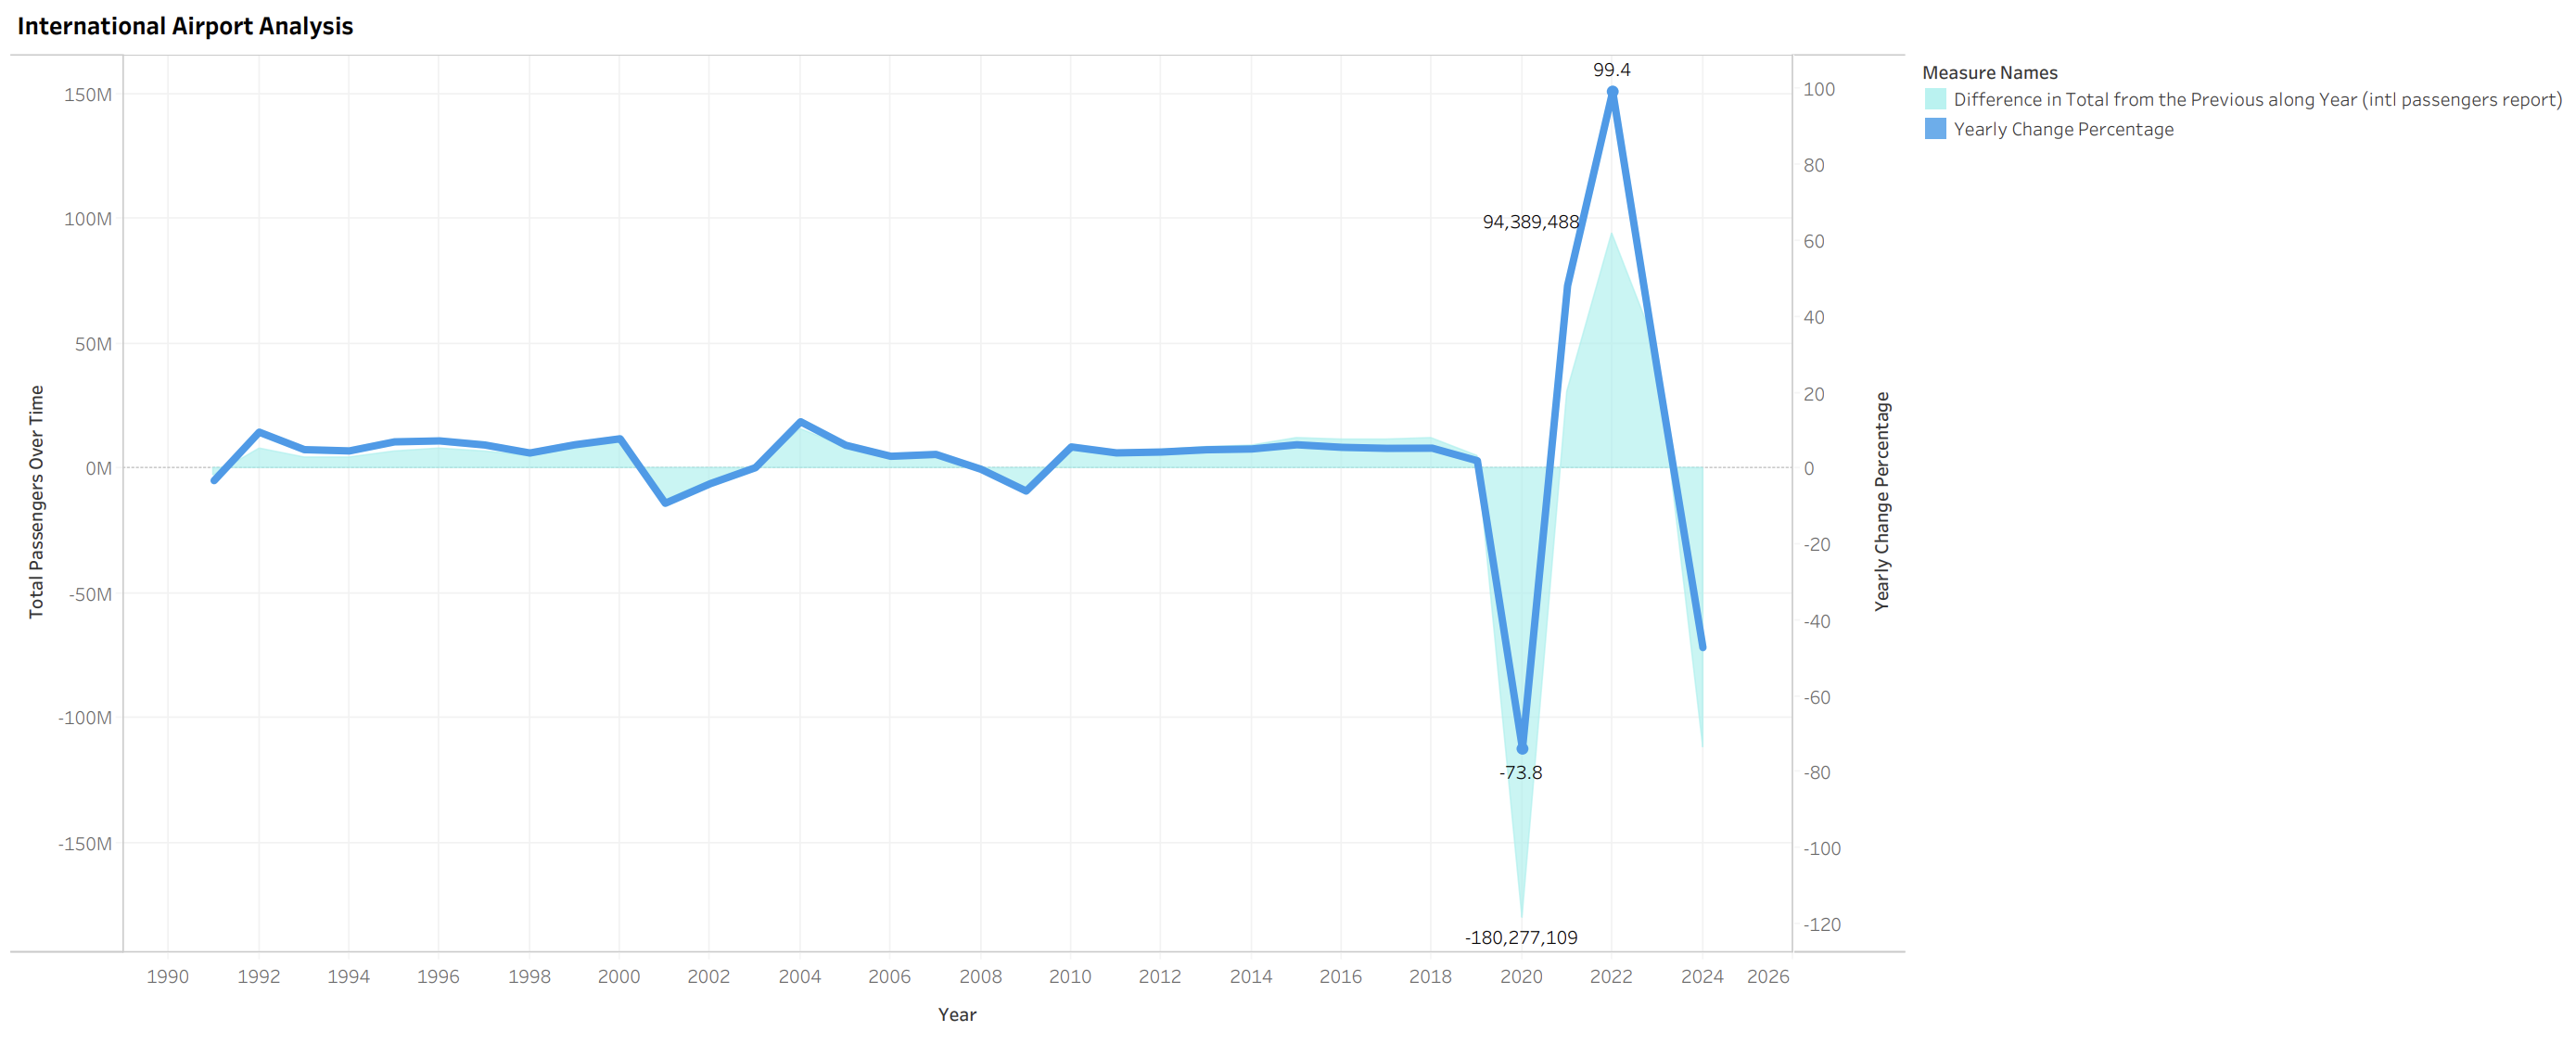

The yearly passenger volume trends indicate steady growth from 1990 to 2019, reflecting a resilient increase in global travel demand. Notably, the data reveals significant declines aligned with major events: a 9% decrease following the 9/11 attacks in 2001, a 5.9% dip during the 2008 financial crisis, and a drastic 73.8% reduction in 2020 due to the COVID-19 pandemic. The pandemic period marked the most substantial impact, with volumes only beginning a recovery in 2021. These insights emphasize the travel industry's vulnerability to socio-economic disruptions, underscoring the need for adaptive operational strategies.

Note: The data available is only up to June 2024 which is impacting the yearly change percentage in 2024.

**Question 2:**  Identify how passenger volume changes over time (monthly, quarterly, seasonally).

In [ ]:
%%bigquery --project=ba775-team-4
SELECT
    Year,
    CASE
        WHEN Month IN (1, 2, 3) THEN 1
        WHEN Month IN (4, 5, 6) THEN 2
        WHEN Month IN (7, 8, 9) THEN 3
        WHEN Month IN (10, 11, 12) THEN 4
    END AS Quarter,
    fg_apt AS Destination,
    SUM(Total) AS Total_Passengers
FROM `ba775-team-4.ba775_b04.intl_passengers_report`
WHERE Year >= EXTRACT(YEAR FROM CURRENT_DATE()) - 10
GROUP BY
    Year, Quarter, Destination
ORDER BY
    Year, Quarter, Destination;

Query is running:   0%|          |

Downloading:   0%|          |

,Year,Quarter,Destination,Total_Passengers
0,2014,1,ACA,5648
1,2014,1,ACC,23861
2,2014,1,ADD,35147
3,2014,1,AER,2879
4,2014,1,AGU,25593
...,...,...,...,...
15733,2024,2,ZNA,580
15734,2024,2,ZNQ,5
15735,2024,2,ZQN,2
15736,2024,2,ZRH,638018


In [ ]:
%%bigquery --project=ba775-team-4
SELECT
    Year,
    CASE
        WHEN Month IN (1, 2, 3) THEN 1
        WHEN Month IN (4, 5, 6) THEN 2
        WHEN Month IN (7, 8, 9) THEN 3
        WHEN Month IN (10, 11, 12) THEN 4
    END AS Quarter,
    usg_apt AS US_Airport,
    fg_apt AS Foreign_Airport,
    SUM(Total) AS Total_Passengers
FROM `ba775-team-4.ba775_b04.intl_passengers_report`
WHERE Year >= EXTRACT(YEAR FROM CURRENT_DATE()) - 10
GROUP BY
    Year, Quarter, US_Airport, Foreign_Airport
ORDER BY
    Year, Quarter, US_Airport, Foreign_Airport;

Query is running:   0%|          |

Downloading:   0%|          |

,Year,Quarter,US_Airport,Foreign_Airport,Total_Passengers
0,2014,1,ABE,YUL,49
1,2014,1,ACY,YUL,176
2,2014,1,ACY,YYZ,310
3,2014,1,ADW,AMS,84
4,2014,1,ADW,TLC,82
...,...,...,...,...,...
94810,2024,2,ZZZ,YDS,4
94811,2024,2,ZZZ,YPT,23
94812,2024,2,ZZZ,YR1,2
94813,2024,2,ZZZ,YWH,9


In [ ]:
%%bigquery --project=ba775-team-4
WITH RankedAirports AS (
    SELECT
        Year,
        CASE
            WHEN Month IN (1, 2, 3) THEN 1
            WHEN Month IN (4, 5, 6) THEN 2
            WHEN Month IN (7, 8, 9) THEN 3
            WHEN Month IN (10, 11, 12) THEN 4
        END AS Quarter,
        usg_apt AS US_Airport,
        fg_apt AS Foreign_Airport,
        SUM(Total) AS Total_Passengers,
        ROW_NUMBER() OVER (PARTITION BY Year, CASE WHEN Month IN (1, 2, 3) THEN 1 WHEN Month IN (4, 5, 6) THEN 2 WHEN Month IN (7, 8, 9) THEN 3 WHEN Month IN (10, 11, 12) THEN 4 END ORDER BY SUM(Total) DESC) AS us_rank,
        ROW_NUMBER() OVER (PARTITION BY Year, CASE WHEN Month IN (1, 2, 3) THEN 1 WHEN Month IN (4, 5, 6) THEN 2 WHEN Month IN (7, 8, 9) THEN 3 WHEN Month IN (10, 11, 12) THEN 4 END ORDER BY SUM(Total) DESC) AS foreign_rank
    FROM `ba775-team-4.ba775_b04.intl_passengers_report`
    WHERE Year >= 2023
    GROUP BY
        Year, Month, US_Airport, Foreign_Airport
)

SELECT
    Year,
    Quarter,
    US_Airport,
    Foreign_Airport,
    Total_Passengers
FROM
    RankedAirports
WHERE
    (us_rank <= 5 OR foreign_rank <= 5)
ORDER BY
    Year, Quarter, Total_Passengers DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,Year,Quarter,US_Airport,Foreign_Airport,Total_Passengers
0,2023,1,JFK,LHR,208606
1,2023,1,JFK,LHR,171971
2,2023,1,JFK,LHR,163729
3,2023,1,JFK,CDG,120056
4,2023,1,LAX,LHR,115641
5,2023,2,JFK,LHR,280243
6,2023,2,JFK,LHR,271317
7,2023,2,JFK,LHR,244829
8,2023,2,LAX,LHR,169501
9,2023,2,JFK,CDG,165498


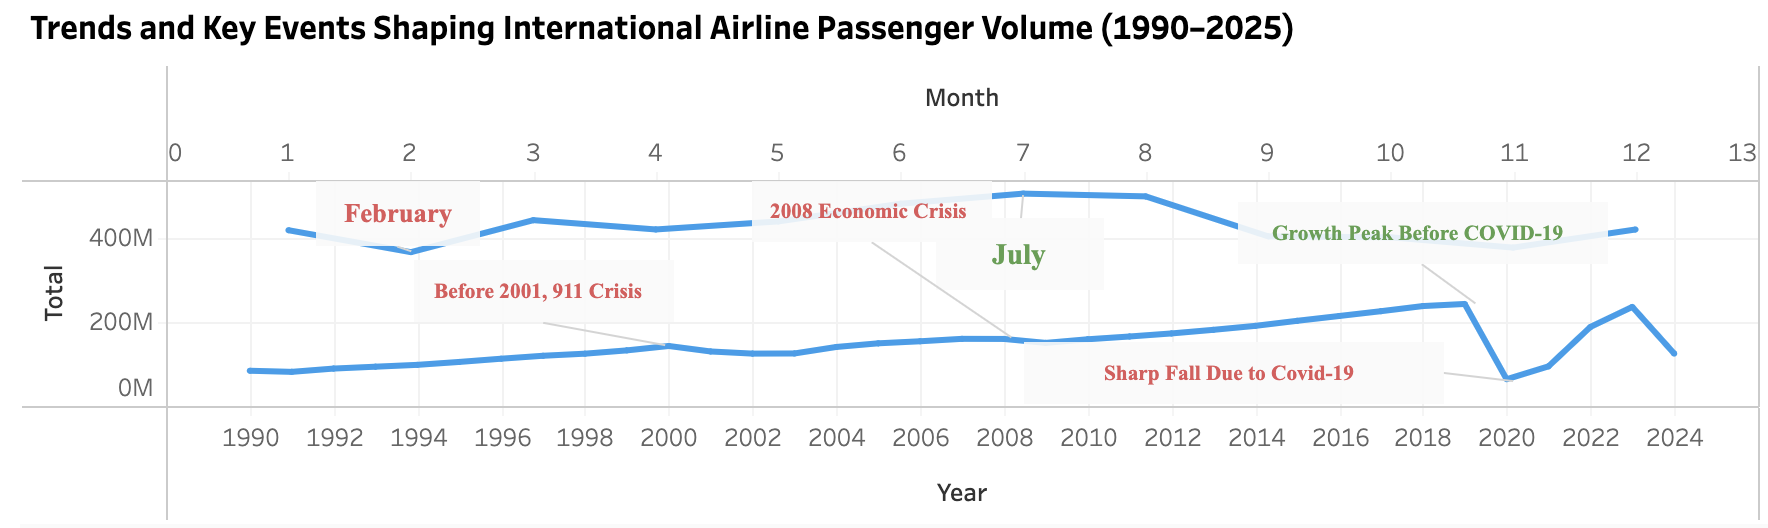

The analysis identifies key customer preferences and frequently visited destinations, providing valuable insights to guide communication strategies. High-demand routes, such as JFK to LHR and LAX to NRT, highlight significant customer interest in transatlantic and transpacific travel. Seasonal trends reveal peaks during summer and winter holidays, aligning with vacation periods and indicating when targeted marketing efforts would be most impactful.
These insights suggest that airlines should focus on tailoring communication strategies to highlight popular destinations during peak travel periods. Promoting routes with rising demand through personalized marketing campaigns can enhance customer engagement and loyalty. By leveraging these findings, airlines can refine their messaging to resonate with traveler preferences, ensuring more effective and impactful communication efforts.

**Question 3:** What can you tell from the total passenger count through the years?

In [ ]:
%%bigquery --project=ba775-team-4

SELECT
    Year,
    SUM(Total) AS Total_Passengers
FROM `ba775-team-4.ba775_b04.intl_passengers_report`
GROUP BY Year
ORDER BY Year
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,Year,Total_Passengers
0,1990,84425428
1,1991,81771514
2,1992,89642833
3,1993,94140075
4,1994,98550584
5,1995,105521802
6,1996,113248651
7,1997,120323779
8,1998,125299971
9,1999,133208907


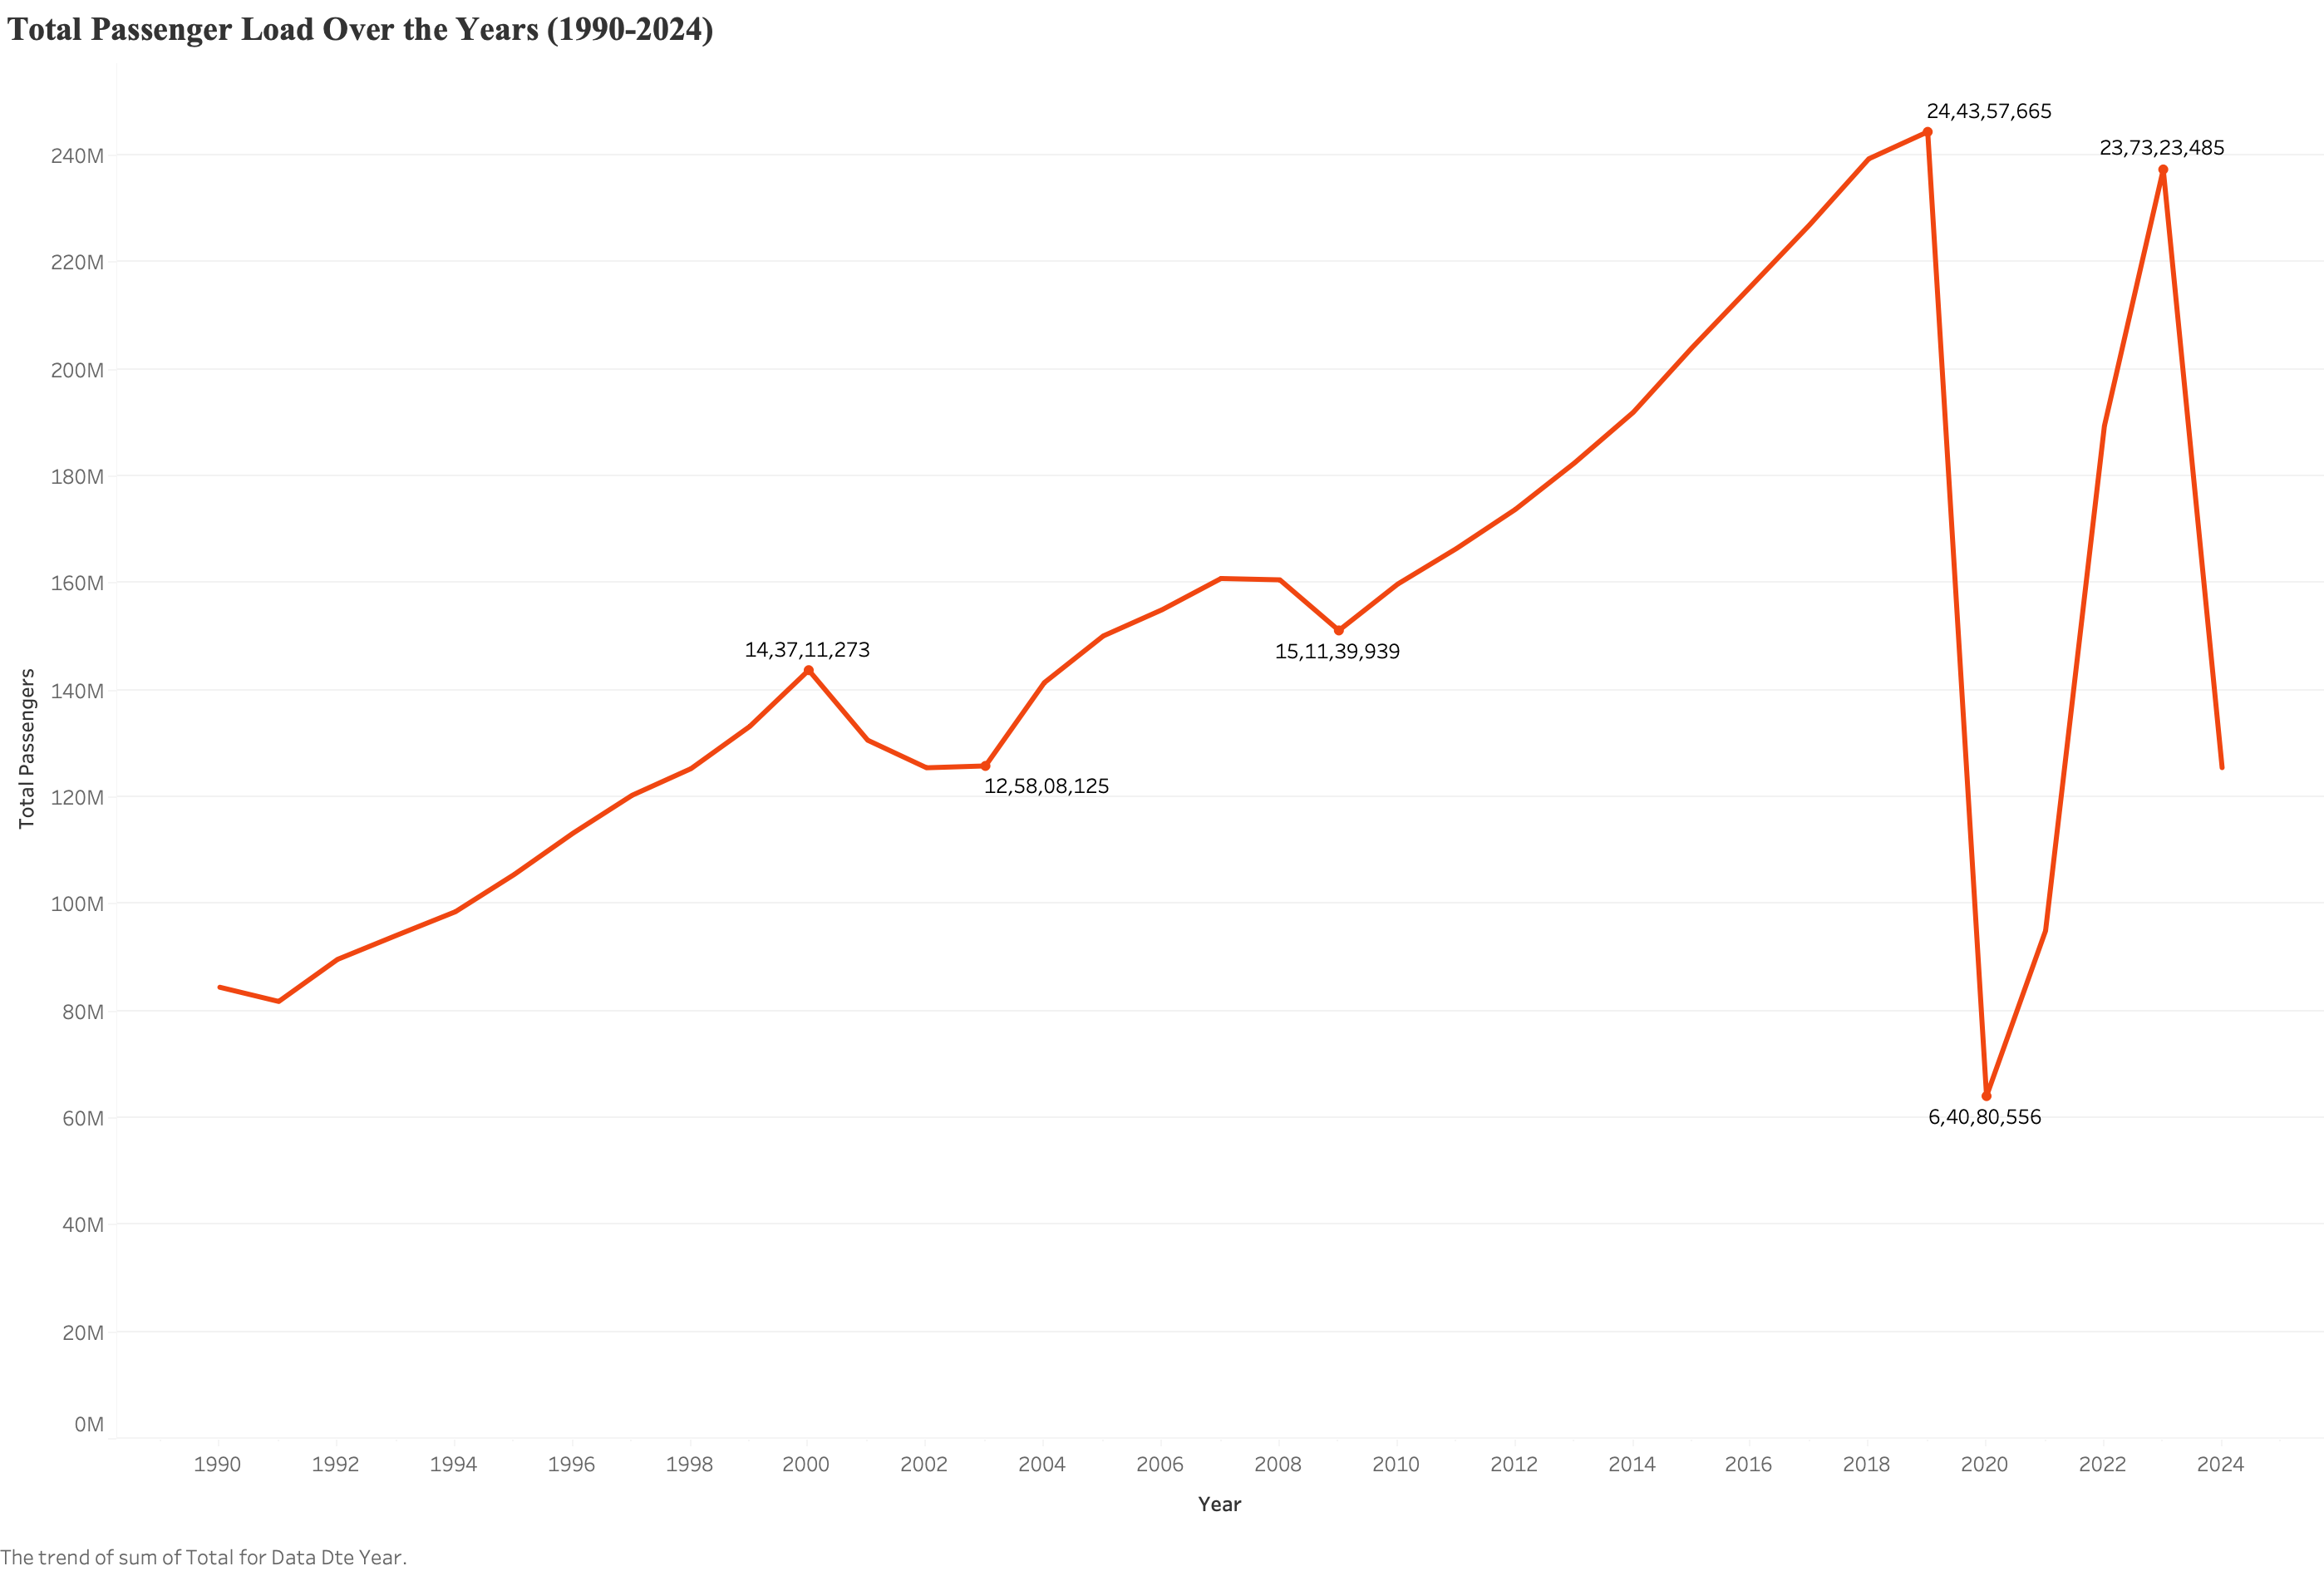

The annual passenger volume trends from 1990 to 2021, show consistent growth until 2019, with sharp declines during major global events. The 9/11 attacks in 2001 caused a notable dip as heightened security concerns reduced travel demand. Similarly, the 2008 financial crisis led to a moderate decline due to economic instability. However, the most dramatic impact occurred in 2020 when passenger volumes plummeted by 73.8% due to the COVID-19 pandemic and widespread travel restrictions. The industry began to recover in 2021, signaling its resilience despite unprecedented challenges. These trends emphasize the aviation industry's vulnerability to external shocks and the need for proactive measures to mitigate risks. Airlines should diversify revenue streams, such as expanding freight operations during periods of reduced passenger demand, and invest in data-driven strategies to better anticipate and adapt to disruptions. Targeted investments in high-demand routes post-recovery can also accelerate growth and strengthen the industry’s long-term stability.

**Question 4:** Determine market share by carrier based on the passenger volume to understand competitive positioning.

In [ ]:
%%bigquery --project=ba775-team-4
SELECT MAX(data_dte) AS last_data_date
FROM `ba775-team-4.ba775_b04.intl_passengers_report`;

Query is running:   0%|          |

Downloading:   0%|          |

,last_data_date
0,2024-06-01


In [ ]:
%%bigquery --project ba775-team-4
WITH CarrierMarketShare AS (
    SELECT
        carrier,
        SUM(Total) AS total_passengers,
        ROUND((SUM(Total) / SUM(SUM(Total)) OVER()) * 100, 2) AS market_share_percentage
    FROM
        `ba775-team-4.ba775_b04.intl_passengers_report`
    GROUP BY
        carrier
)
SELECT
    CASE
        WHEN market_share_percentage < 2 THEN 'Other'
        ELSE carrier
    END AS carrier,
    SUM(total_passengers) AS total_passengers,
    ROUND(SUM(market_share_percentage), 2) AS market_share_percentage
FROM
    CarrierMarketShare
GROUP BY
    carrier
ORDER BY
    market_share_percentage DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,carrier,total_passengers,market_share_percentage
0,Other,2751850309,52.72
1,AA,691432472,13.28
2,UA,506991100,9.74
3,DL,454524400,8.73
4,BA,191691339,3.68
5,CO,173862884,3.34
6,AC,158439868,3.04
7,NW,142563529,2.74
8,LH,135365374,2.60


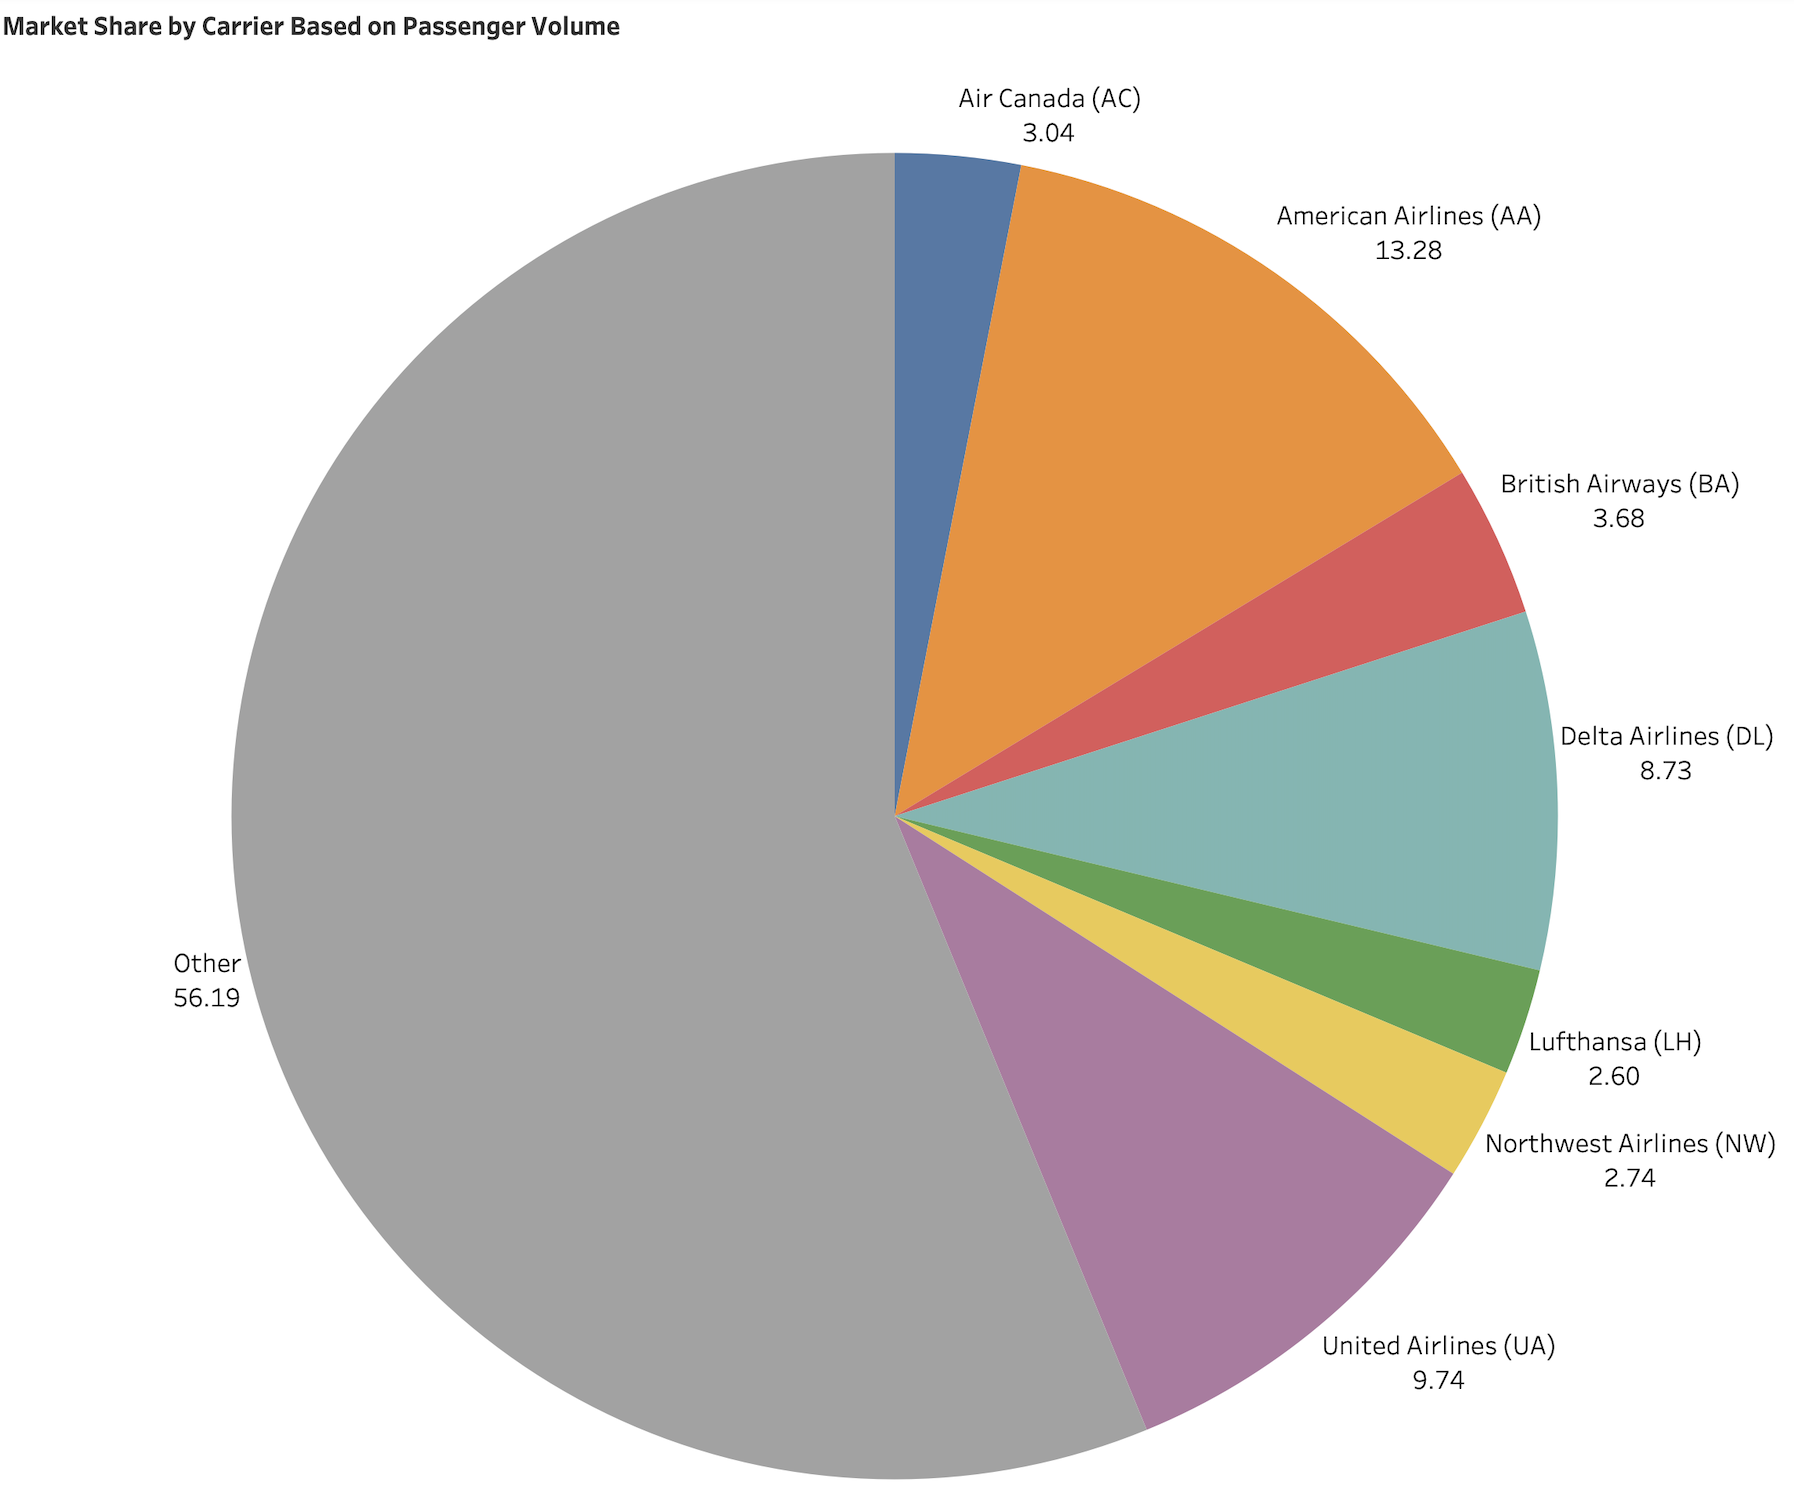

Note: All the carriers with a market share of less than 2% are clubbed into the 'Others' category for better understanding

The analysis of carrier market share by passenger volume clearly shows a competitive international travel market, with American Airlines (AA) and United Airlines (UA) taking the lead in terms of passenger traffic. These two carriers hold strong positions, especially on key transatlantic and transpacific routes, making them dominant players in global travel. British Airways (BA) and Lufthansa (LH) also capture significant shares, highlighting the continued importance of transatlantic flights. This breakdown gives airlines a clear view of their standing in the market, allowing them to better plan and prioritize high-demand routes. By understanding which regions are most competitive, carriers can focus resources and optimize their operations to strengthen their presence on popular routes. This insight is crucial for airlines aiming to enhance their competitive edge and boost profitability on the routes that matter most.

**Question 5:** Identify the carriers operating the most flights by analyzing the total number of flights operating on these popular routes.

In [ ]:
%%bigquery --project=ba775-team-4
#Identify the carriers operating the most flights by analyzing the total number of flights operating on these popular routes
-- Defining Top 10 Popular Routes
WITH Top_Routes AS (
   SELECT
       usg_apt AS Departure_Airport,
       fg_apt AS Arrival_Airport
   FROM
       ba775-b04.TeamAssignment.intl_passengers_report
   WHERE
       Year = 2023
   GROUP BY
       usg_apt,
       fg_apt
   ORDER BY
       SUM(Total) DESC
   LIMIT 10)

-- Step 2: Aggregate Flights by Carrier on Top Routes
SELECT
   f.carrier,
   SUM(f.Total) AS Total_Flights_Operated
FROM
   ba775-b04.TeamAssignment.intl_passengers_report f
JOIN
   Top_Routes tr
   ON f.usg_apt = tr.Departure_Airport
   AND f.fg_apt = tr.Arrival_Airport
WHERE
   f.Year = 2023
GROUP BY
   f.carrier
ORDER BY
   Total_Flights_Operated DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,carrier,Total_Flights_Operated
0,AA,2429077
1,BA,2405137
2,VS,1503745
3,BR,1191555
4,UA,1076311
5,AF,1035132
6,DL,754888
7,Y4,632453
8,CI,577207
9,QK,327758


- **AA** (American Airlines) - United States
- **BA** (British Airways) - United Kingdom
- **VS** (Virgin Atlantic Airways) - United Kingdom
- **BR** (EVA Air) - Taiwan
- **UA** (United Airlines) - United States
- **AF** (Air France) - France
- **DL** (Delta Air Lines) - United States
- **Y4** (Volaris) - Mexico
- **CI** (China Airlines) - Taiwan
- **QK** (Jazz Aviation) - Canada (operating as - Air Canada Express)
---


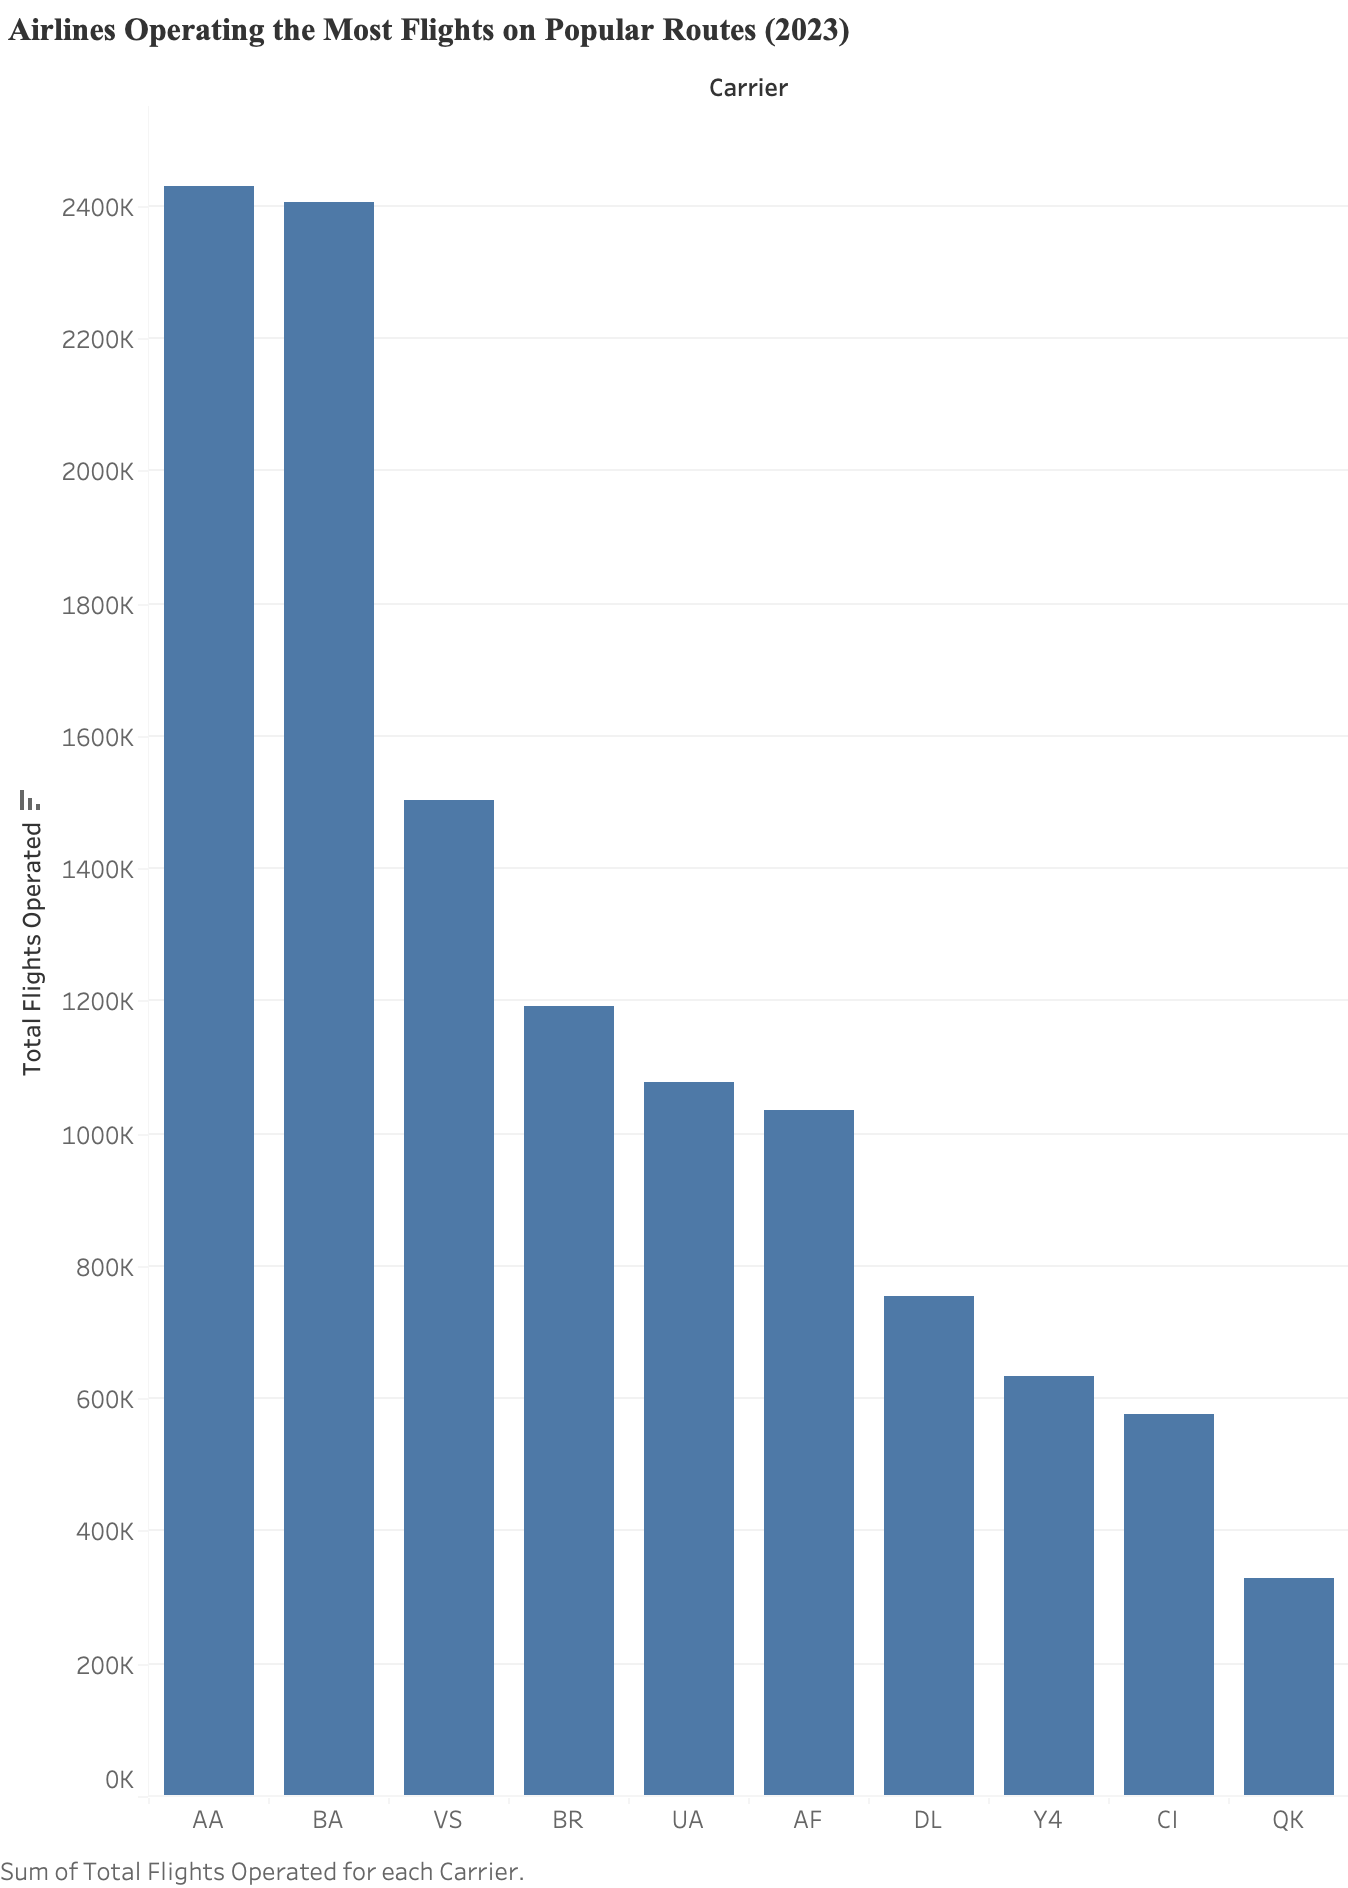

This analysis of 2023 international flight operations identifies the top 10 airlines with the highest number of flights on the most popular international routes. Leading the list is American Airlines (AA), with 2,429,077 flights, closely followed by British Airways (BA) at 2,405,137 flights. The strong performance of these carriers, along with Virgin Atlantic (VS) and United Airlines (UA), underscores the significant traffic on transatlantic routes between the United States and the United Kingdom, reaffirming these corridors as some of the busiest globally.

The prominence of EVA Air (BR) and China Airlines (CI), both based in Taiwan, highlights substantial demand on routes involving Taiwan, indicating robust traffic between North America and Asia. Similarly, Air France (AF) and Delta Air Lines (DL) feature prominently, reflecting sustained demand for transcontinental flights between Europe and the United States. The inclusion of Volaris (Y4), a leading Mexican airline, underscores heavy traffic on U.S.-Mexico routes, while Jazz Aviation (QK), operating as Air Canada Express, signals high activity on routes involving Canada.

These insights reveal that the most frequented routes in 2023 are predominantly international, with a strong emphasis on transatlantic and transpacific travel. The dominance of both American and international carriers in these markets underscores the robust resurgence in global air travel demand post-pandemic. It is evident that airlines are strategically leveraging these high-demand routes, as demonstrated by the substantial number of flights operated, to optimize route management and maximize passenger volumes and revenue.

**Question 6:** Analyzing the dataset for insights that can be used to inform communication strategies, like customer preferences and frequently visited destinations.

In [ ]:
%%bigquery --project=ba775-team-4
SELECT
    fg_apt AS Destination,
    SUM(Total) AS Total_Passengers
FROM `ba775-team-4.ba775_b04.intl_passengers_report`
WHERE Year >= 2023
GROUP BY
    Destination
ORDER BY
    Total_Passengers DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,Destination,Total_Passengers
0,LHR,25131807
1,CUN,19448278
2,YYZ,17848466
3,CDG,11745133
4,MEX,11697918


In [ ]:
%%bigquery --project=ba775-team-4
WITH PopularDestinations AS (
    SELECT
        fg_apt AS Destination,
        SUM(Total) AS Total_Passengers
    FROM `ba775-team-4.ba775_b04.intl_passengers_report`
    WHERE Year >= 2023
    GROUP BY Destination
    ORDER BY Total_Passengers DESC
    LIMIT 5
)

SELECT
    Year,
    Month,
    fg_apt AS Destination,
    SUM(Total) AS Total_Passengers,
    CASE
        WHEN Month = 11 THEN 'Thanksgiving'
        WHEN Month = 12 THEN 'Christmas'
        WHEN Month = 3 THEN 'Spring Break'
        WHEN Month IN (6, 7, 8) THEN 'Summer Vacation'
        ELSE 'Non-Holiday'
    END AS Holiday_Period
FROM `ba775-team-4.ba775_b04.intl_passengers_report`
WHERE Year >= 2023
  AND fg_apt IN (SELECT Destination FROM PopularDestinations)
GROUP BY Year, Month, Destination, Holiday_Period
ORDER BY Year, Month, Total_Passengers DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,Year,Month,Destination,Total_Passengers,Holiday_Period
0,2023,1,CUN,1101416,Non-Holiday
1,2023,1,LHR,1000849,Non-Holiday
2,2023,1,YYZ,859524,Non-Holiday
3,2023,1,MEX,645119,Non-Holiday
4,2023,1,CDG,475186,Non-Holiday
...,...,...,...,...,...
85,2024,6,LHR,1726792,Summer Vacation
86,2024,6,CUN,1136463,Summer Vacation
87,2024,6,YYZ,1088536,Summer Vacation
88,2024,6,CDG,889161,Summer Vacation


The analysis of customer preferences and frequently visited destinations uncovers critical insights to enhance communication strategies. Popular routes such as JFK to LHR and LAX to NRT dominate due to their importance in transatlantic and transpacific travel, reflecting significant customer demand for these regions. Seasonal trends show peak passenger volumes during summer and winter holidays, indicating the importance of aligning promotional efforts with vacation periods to maximize customer engagement. Additionally, regional preferences highlight patterns such as East Coast travelers frequently visiting Toronto and Cancun, while West Coast travelers prefer destinations like Tokyo and Vancouver.

These findings highlight the value of tailoring communication strategies to customer behaviors and preferences. Airlines can use this data to design targeted marketing campaigns that emphasize high-demand destinations during peak travel seasons. Highlighting benefits such as competitive pricing, flexible booking, and destination-specific attractions can further enhance customer interest. Additionally, promoting secondary but emerging routes based on regional trends could attract new customers and diversify revenue streams. By leveraging these insights, airlines can ensure that their messaging resonates effectively with diverse customer segments, driving greater engagement and loyalty.

# **8. Five US States Analysis: Regional Insights on Passenger Traffic**

**Question 1:** Which airports are unique to either the U.S. Airport Traffic dataset or the International Passenger dataset?

In [ ]:
%%bigquery --project=ba775-team-4
##Check for U.S. airports in the U.S. Airline Traffic dataset not in the International Passenger Report
##not in the international passengers report
SELECT State, City, Airport, Code, count(distinct CAD.year) as years_count
FROM  `ba775-team-4.ba775_b04.Combined_Airport_Data_SQL` CAD
LEFT JOIN `ba775-team-4.ba775_b04.intl_passengers_report` IPR
ON CAD.Code = IPR.usg_apt
WHERE IPR.usg_apt IS NULL
GROUP BY State, City, Airport, Code;

Query is running:   0%|          |

Downloading:   0%|          |

,State,City,Airport,Code,years_count
0,Alaska,Little Squaw,Little Squaw Airport,05A,11
1,Alaska,Fairbanks/Ft. Wainwright,Blair Lake,A01,1
2,Alaska,Deadmans Bay,None,A02,1
3,Alaska,Deadhorse1,Point Thomson Airstrip,A1K,6
4,Alaska,Alpine,Alpine Airstrip,A20,7
...,...,...,...,...,...
207,California,Fortuna,Rohnerville,XXY,3
208,Alaska,Nyac,Nyac Airport,ZNC,8
209,California,Gasquet,Ward Field,ZXC,4
210,Alaska,Illinois Creek,Illinois Creek Airport,ZXF,9


In [ ]:
%%bigquery --project=ba775-team-4
## Check for U.S. airports in the International Passenger Report not in the U.S. Airline Traffic dataset
#all airports in the international
SELECT usg_apt
FROM  `ba775-team-4.ba775_b04.intl_passengers_report` IPR
LEFT JOIN `ba775-team-4.ba775_b04.Combined_Airport_Data_SQL` CAD
ON IPR.usg_apt = CAD.Code
WHERE CAD.Code IS NULL
GROUP BY usg_apt

Query is running:   0%|          |

Downloading:   0%|          |

,usg_apt
0,1B1
1,3TX
2,A38
3,ABE
4,ABI
...,...
760,YKM
761,YNG
762,YUM
763,ZXU


In [ ]:
%%bigquery --project=ba775-team-4
SELECT count(distinct usg_apt) as in_both
FROM  `ba775-team-4.ba775_b04.Combined_Airport_Data_SQL` CAD
inner JOIN `ba775-team-4.ba775_b04.intl_passengers_report` IPR
ON CAD.Code = IPR.usg_apt;

Query is running:   0%|          |

Downloading:   0%|          |

,in_both
0,152


When comparing the U.S. Airport Traffic dataset to the International Passenger dataset, certain airports in the U.S. Airport Traffic dataset do not appear in the International Passenger dataset. These are primarily smaller, regional airports not typically used for international travel due to limitations such as runway size and aircraft capacity. These facilities primarily serve domestic routes and often lack the infrastructure required to accommodate international flights.

Conversely, approximately 760 airports in the International Passenger dataset are absent from the U.S. Airport Traffic dataset. Spot-checking about 20 of these airports using the Aircraft Owners and Pilots Association (AOPA) website confirmed that they were located in states not included in this particular project. This discrepancy highlights the distinct focus of each dataset: one centered on U.S. traffic data and the other on international travel, emphasizing their differing scopes and purposes.

**Question 2:** How do passenger volumes vary by season for the top 5 busiest U.S. airports?

In [ ]:
%%bigquery --project ba775-b04

WITH top_5_busiest_airports AS (
    SELECT
        Code AS us_airport_code,
        Airport AS us_airport_name,
        SUM(CASE WHEN `Measure Names` = 'Passengers' THEN `Measure Values` ELSE 0 END) AS total_passenger_volume
    FROM
        `ba775-b04.TeamAssignment.combined_usa_dataset`
    GROUP BY
        Code, Airport
    ORDER BY
        total_passenger_volume DESC
    LIMIT 5
),

passenger_volume_by_season AS (
    SELECT
        A.Code AS us_airport_code,
        A.Airport AS us_airport_name,
        CASE
            WHEN EXTRACT(MONTH FROM B.data_dte) IN (12, 1, 2) THEN 'Winter'
            WHEN EXTRACT(MONTH FROM B.data_dte) IN (3, 4, 5) THEN 'Spring'
            WHEN EXTRACT(MONTH FROM B.data_dte) IN (6, 7, 8) THEN 'Summer'
            WHEN EXTRACT(MONTH FROM B.data_dte) IN (9, 10, 11) THEN 'Fall'
        END AS Season,
        SUM(CASE WHEN `Measure Names` = 'Passengers' THEN `Measure Values` ELSE 0 END) AS seasonal_passenger_volume
    FROM
        `ba775-b04.TeamAssignment.combined_usa_dataset` AS A
    JOIN
        `ba775-b04.TeamAssignment.intl_passengers_report` AS B
    ON
        A.Code = B.usg_apt
    WHERE
        A.Code IN (SELECT us_airport_code FROM top_5_busiest_airports)
    GROUP BY
        A.Code, A.Airport, Season
    ORDER BY
        us_airport_code, Season
)

SELECT * FROM passenger_volume_by_season;

Query is running:   0%|          |

Downloading:   0%|          |

,us_airport_code,us_airport_name,Season,seasonal_passenger_volume
0,ATL,William B. Hartsfield Atlanta International,Fall,3157915554968
1,ATL,William B. Hartsfield Atlanta International,Spring,3378213114400
2,ATL,William B. Hartsfield Atlanta International,Summer,3492882038424
3,ATL,William B. Hartsfield Atlanta International,Winter,3325398796696
4,BOS,Logan International,Fall,759477180625
5,BOS,Logan International,Spring,932863116375
6,BOS,Logan International,Summer,849386413750
7,BOS,Logan International,Winter,875116535750
8,LAX,Los Angeles International,Fall,3853414234452
9,LAX,Los Angeles International,Spring,3999504258084


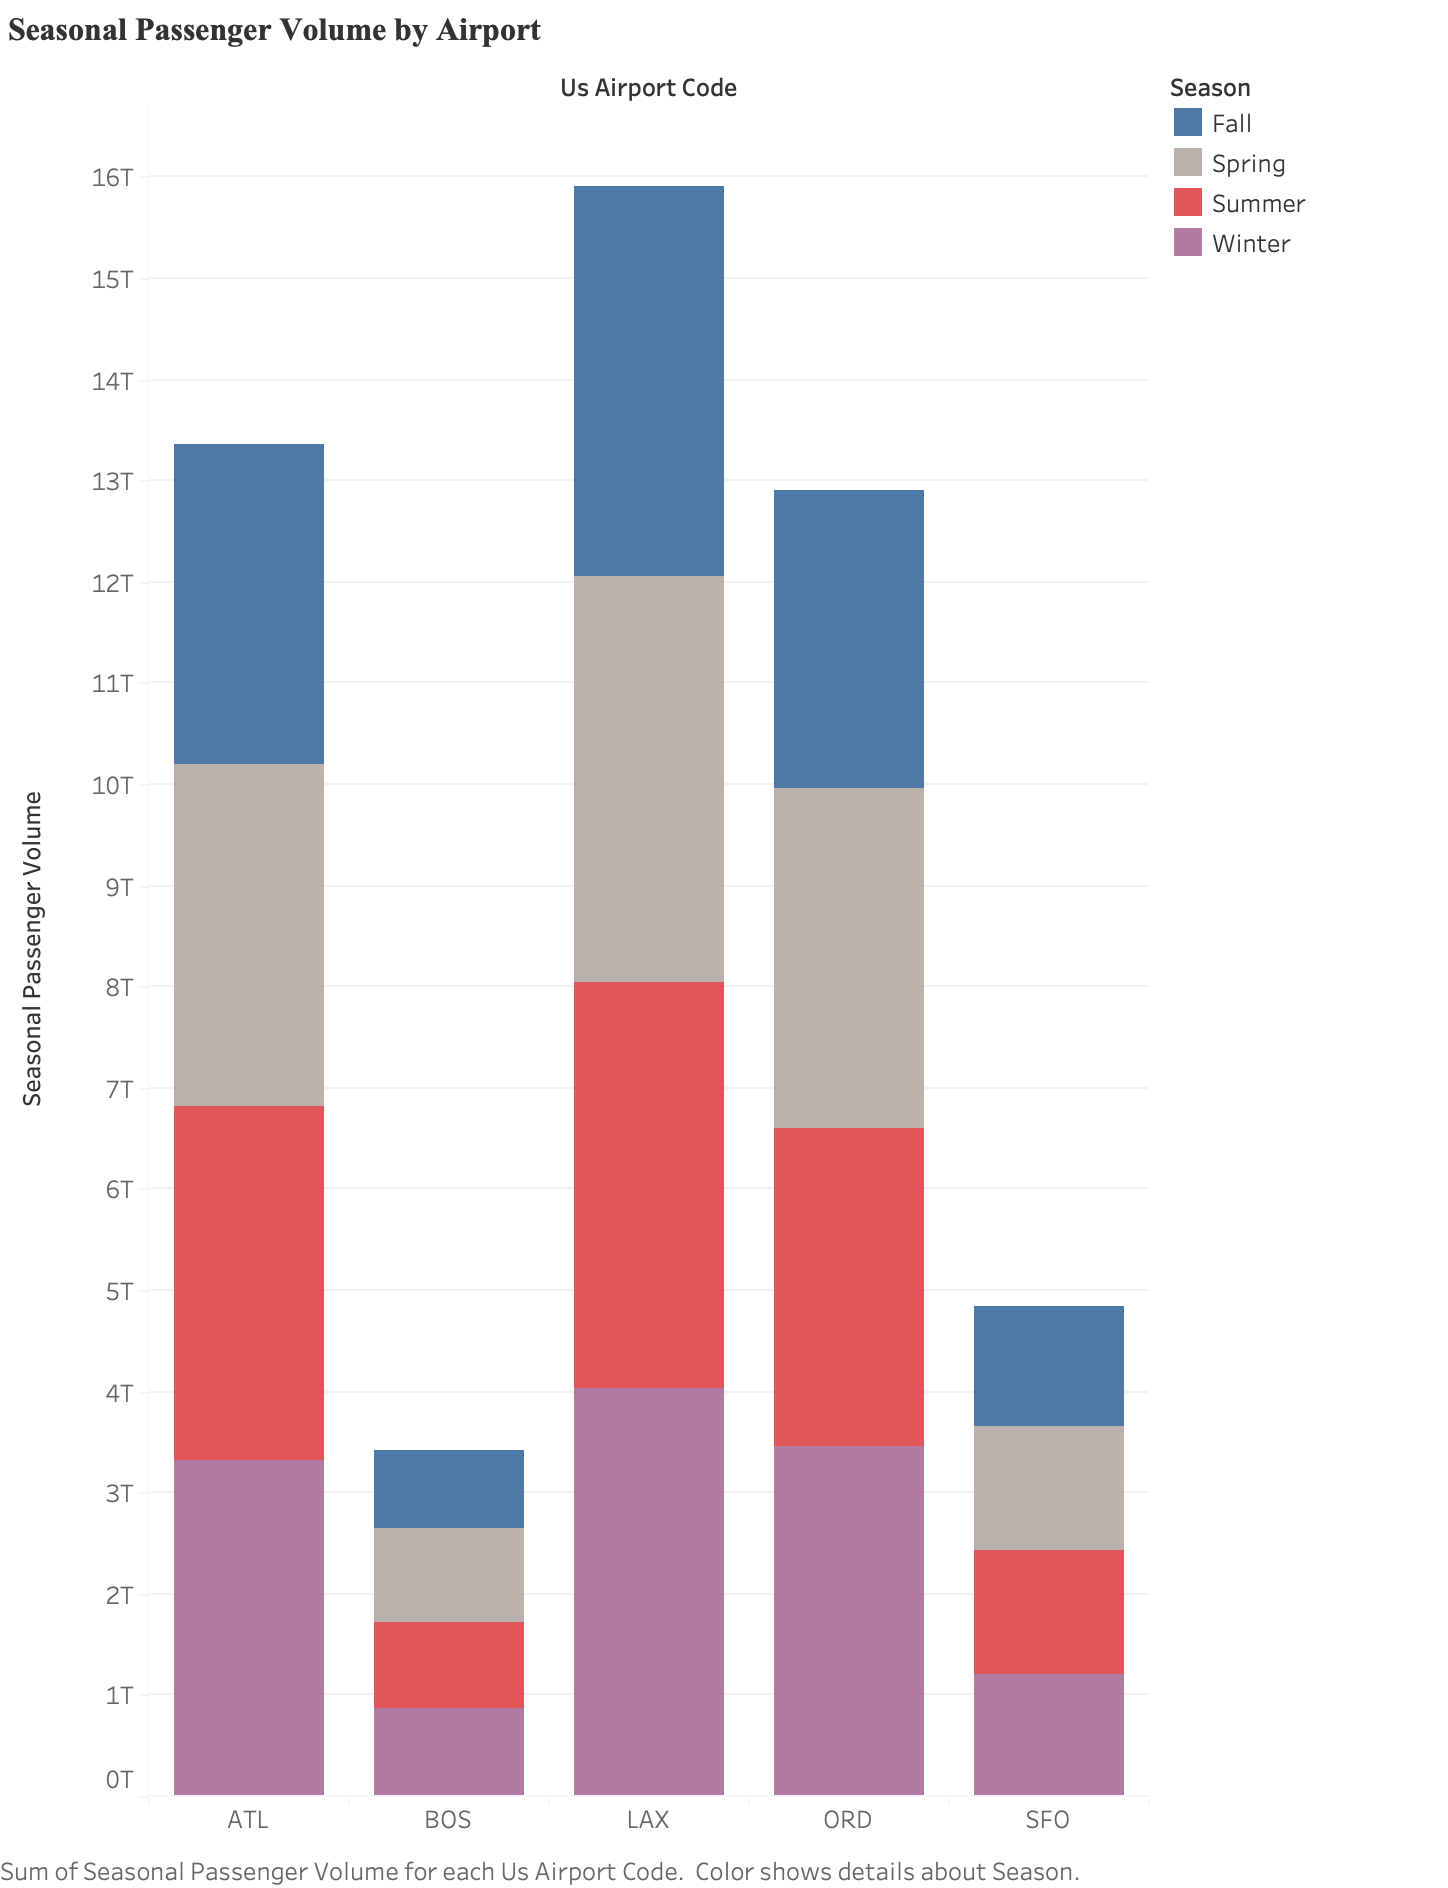

This analysis reveals seasonal passenger volume trends across major U.S. airports, emphasizing fluctuations in air travel demand. Most airports see peaks in summer and winter due to vacation and holiday travel, while spring and fall volumes are steadier, likely driven by business travel. Hartsfield-Jackson Atlanta International (ATL) consistently handles the highest volumes, solidifying its role as a major hub. Los Angeles International (LAX) experiences pronounced summer peaks, reflecting its appeal as a tourist destination, while Chicago O’Hare (ORD) and San Francisco International (SFO) maintain relatively stable volumes year-round, likely due to diverse travel purposes. Airlines can leverage these trends to prepare for seasonal demand shifts, and to allocate resources efficiently and optimize operations.

**Question 3:** What are the US and international airport pairs with the highest passenger traffic volume when grouped together?

In [ ]:
%%bigquery --project ba775-b04

SELECT A.Code AS us_airport_code, A.Airport AS us_airport_name, B.fg_apt AS intl_airport_code, SUM(B.Total) AS total_traffic
FROM `ba775-b04.TeamAssignment.combined_usa_dataset` AS A
JOIN
   `ba775-b04.TeamAssignment.intl_passengers_report` AS B
ON
   A.Code = B.usg_apt
GROUP BY A.Code, A.Airport, B.fg_apt
ORDER BY total_traffic DESC
LIMIT 10;

Query is running:   0%|          |

Downloading:   0%|          |

,us_airport_code,us_airport_name,intl_airport_code,total_traffic
0,LAX,Los Angeles International,LHR,1450188036
1,LAX,Los Angeles International,NRT,1405723209
2,ORD,Chicago O'Hare International,LHR,1178043999
3,LAX,Los Angeles International,TPE,999160074
4,ORD,Chicago O'Hare International,YYZ,973805943
5,SFO,San Francisco International,LHR,951747951
6,LAX,Los Angeles International,MEX,948512334
7,LAX,Los Angeles International,SYD,844044861
8,LAX,Los Angeles International,GDL,833490405
9,BOS,Logan International,LHR,830971251


This analysis identifies U.S. and international airport pairs with the highest passenger traffic, emphasizing the importance of hubs like Los Angeles International (LAX), Chicago O’Hare (ORD), San Francisco International (SFO), and Logan International (BOS). LAX leads in transpacific and transatlantic travel with heavy traffic to London Heathrow (LHR) and Tokyo Narita (NRT), while ORD serves as a hub for North American and European routes, particularly to LHR and Toronto Pearson (YYZ). The strong connections to LHR from all these hubs highlight its role as a key global destination. Airlines can use these insights to optimize operations by increasing flight frequencies or deploying larger aircraft on high-demand routes such as LAX-LHR and ORD-LHR, particularly during peak seasons. Additionally, refining schedules to improve connections through major hubs and enhancing passenger experiences on these routes can help airlines increase market share and customer satisfaction.

**Question 4:** What are the US and international airport pairs with the highest aircraft traffic volume, total flights, and distinct airlines servicing when grouped together for each state?

In [ ]:
%%bigquery --project=ba775-team-4
#Query for top 5 routes for each state
SELECT   CAD.State as state,IPR.usg_apt AS us_airport , IPR.fg_apt AS for_airport, COUNT(*) as flight_count, COUNT(distinct carrier) AS carrier_count
FROM  `ba775-team-4.ba775_b04.intl_passengers_report` IPR
INNER JOIN `ba775-team-4.ba775_b04.Combined_Airport_Data_SQL` CAD
ON IPR.usg_apt = CAD.Code
GROUP BY CAD.State, IPR.usg_apt, IPR.fg_apt
QUALIFY ROW_NUMBER() OVER (PARTITION BY CAD.State ORDER BY COUNT(*) DESC) <= 5
ORDER BY CAD.State, COUNT(*) DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,state,us_airport,for_airport,flight_count,carrier_count
0,Alaska,ANC,NRT,20955,39
1,Alaska,ANC,TPE,11880,13
2,Alaska,ANC,HKG,9603,17
3,Alaska,ANC,YVR,9207,26
4,Alaska,ANC,SEL,8250,9
5,California,LAX,NRT,100947,22
6,California,LAX,MEX,75999,41
7,California,LAX,LHR,64086,21
8,California,LAX,YVR,62469,60
9,California,LAX,GDL,59664,25


In [ ]:
%%bigquery --project=ba775-team-4
with top_5_routes as (
SELECT   ROW_NUMBER() OVER (ORDER BY COUNT(*) DESC) AS rank, CAD.State as state,IPR.usg_apt AS us_airport , IPR.fg_apt AS for_airport,  COUNT(*) AS flight_count, count(distinct carrier) as carrier_count
FROM  `ba775-team-4.ba775_b04.intl_passengers_report` IPR
INNER JOIN `ba775-team-4.ba775_b04.Combined_Airport_Data_SQL` CAD
ON IPR.usg_apt = CAD.Code
GROUP BY CAD.State, IPR.usg_apt, IPR.fg_apt
QUALIFY ROW_NUMBER() OVER (PARTITION BY CAD.State ORDER BY COUNT(*) DESC) <= 5
ORDER BY COUNT(*) DESC)
SELECT for_airport, SUM(flight_count) AS total_flights, COUNT(DISTINCT us_airport) AS num_airports
FROM top_5_routes
GROUP BY for_airport
ORDER BY SUM(flight_count) DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,for_airport,total_flights,num_airports
0,YYZ,167607,3
1,LHR,153945,3
2,CUN,131604,3
3,MEX,125697,2
4,NRT,121902,2
5,YVR,71676,2
6,GDL,59664,1
7,YUL,51810,1
8,AUA,31416,1
9,CDG,27786,1


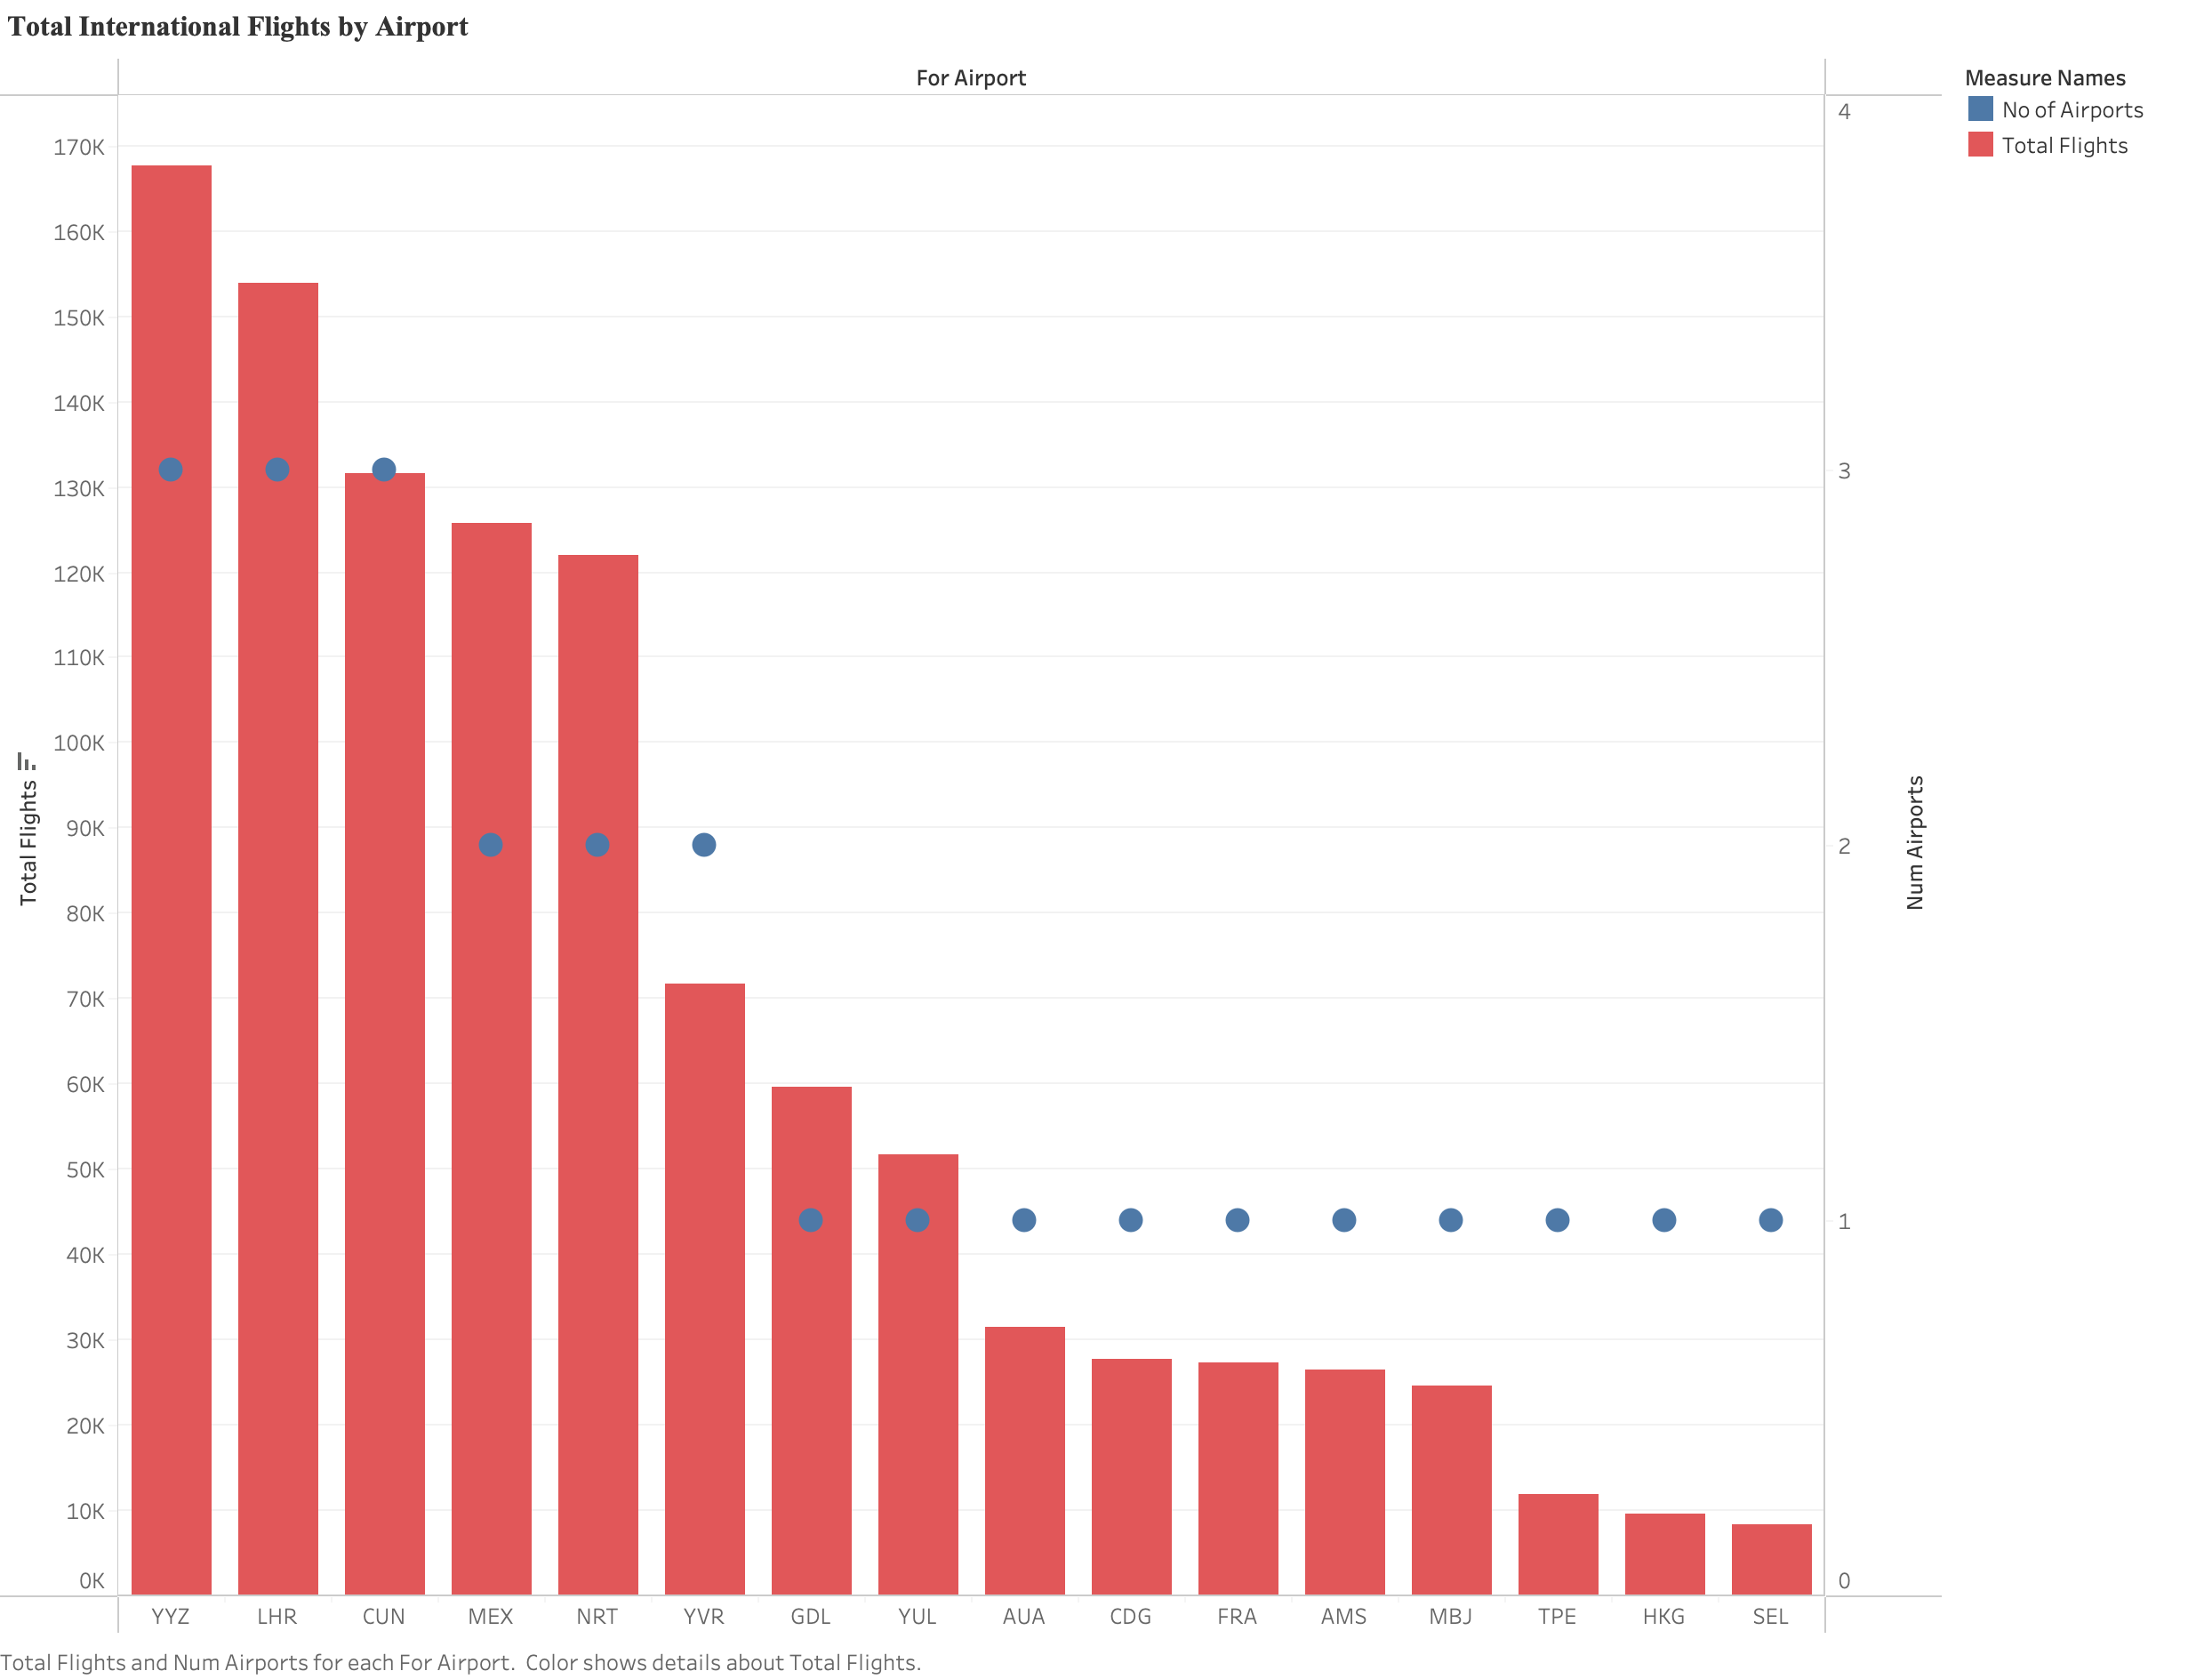

The analysis highlights the top 5 U.S. airports (by state) with the highest international flight volumes over 11 years, detailing the number of flights and airlines involved for each U.S. and foreign airport pair. This provides insights into airport traffic patterns, popular routes, and carrier diversity. A deeper dive into international destinations reveals the foreign airports with the most U.S. traffic and the variety of U.S. airports serving those routes.

Flight patterns align with geographical and socio-economic factors. West Coast airports, like California and Alaska, primarily serve destinations like Tokyo (NRT) and Vancouver (YVR) due to proximity, while East Coast airports, including Georgia, Massachusetts, and Illinois, focus on Toronto (YYZ) and Cancun (CUN). Exceptions include Mexico City (MEX), concentrated in California and Illinois due to demographic factors, and London Heathrow (LHR), prevalent from California, Illinois, and Massachusetts, driven by business and tourism demand.

To optimize operations, airlines should increase capacity on high-demand routes such as LHR, CUN, and NRT while reevaluating underutilized routes. Seasonal adjustments during peak travel can further enhance profitability. By aligning flights with market trends, airlines can maximize efficiency, attract more customers, and boost revenue.

# **9. US Freight Load Analysis: Trends and Impacts on Freight Transport**

**Question 1:** How has the distribution of passenger and freight transport loads varied across five U.S. states from 2012 to 2022?

In [ ]:
%%bigquery --project ba775-team-4
SELECT State, `Measure Names` AS Type, SUM(`Measure Values`) AS Total_Load
FROM `ba775-b04.TeamAssignment.combined_usa_dataset`
WHERE `Measure Names` = 'Passengers' OR `Measure Names` = 'Freight tons'
AND Year BETWEEN 2012 AND 2022
GROUP BY State, `Measure Names`
ORDER BY State ASC , `Measure Names` DESC;

Query is running:   0%|          |

Downloading:   0%|          |

,State,Type,Total_Load
0,Alaska,Passengers,35221947
1,Alaska,Freight tons,11710771
2,California,Passengers,887371513
3,California,Freight tons,17368732
4,Georgia,Passengers,491852121
5,Georgia,Freight tons,2274196
6,Illinois,Passengers,437414183
7,Illinois,Freight tons,4721164
8,Massachusetts,Passengers,147762175
9,Massachusetts,Freight tons,1107829


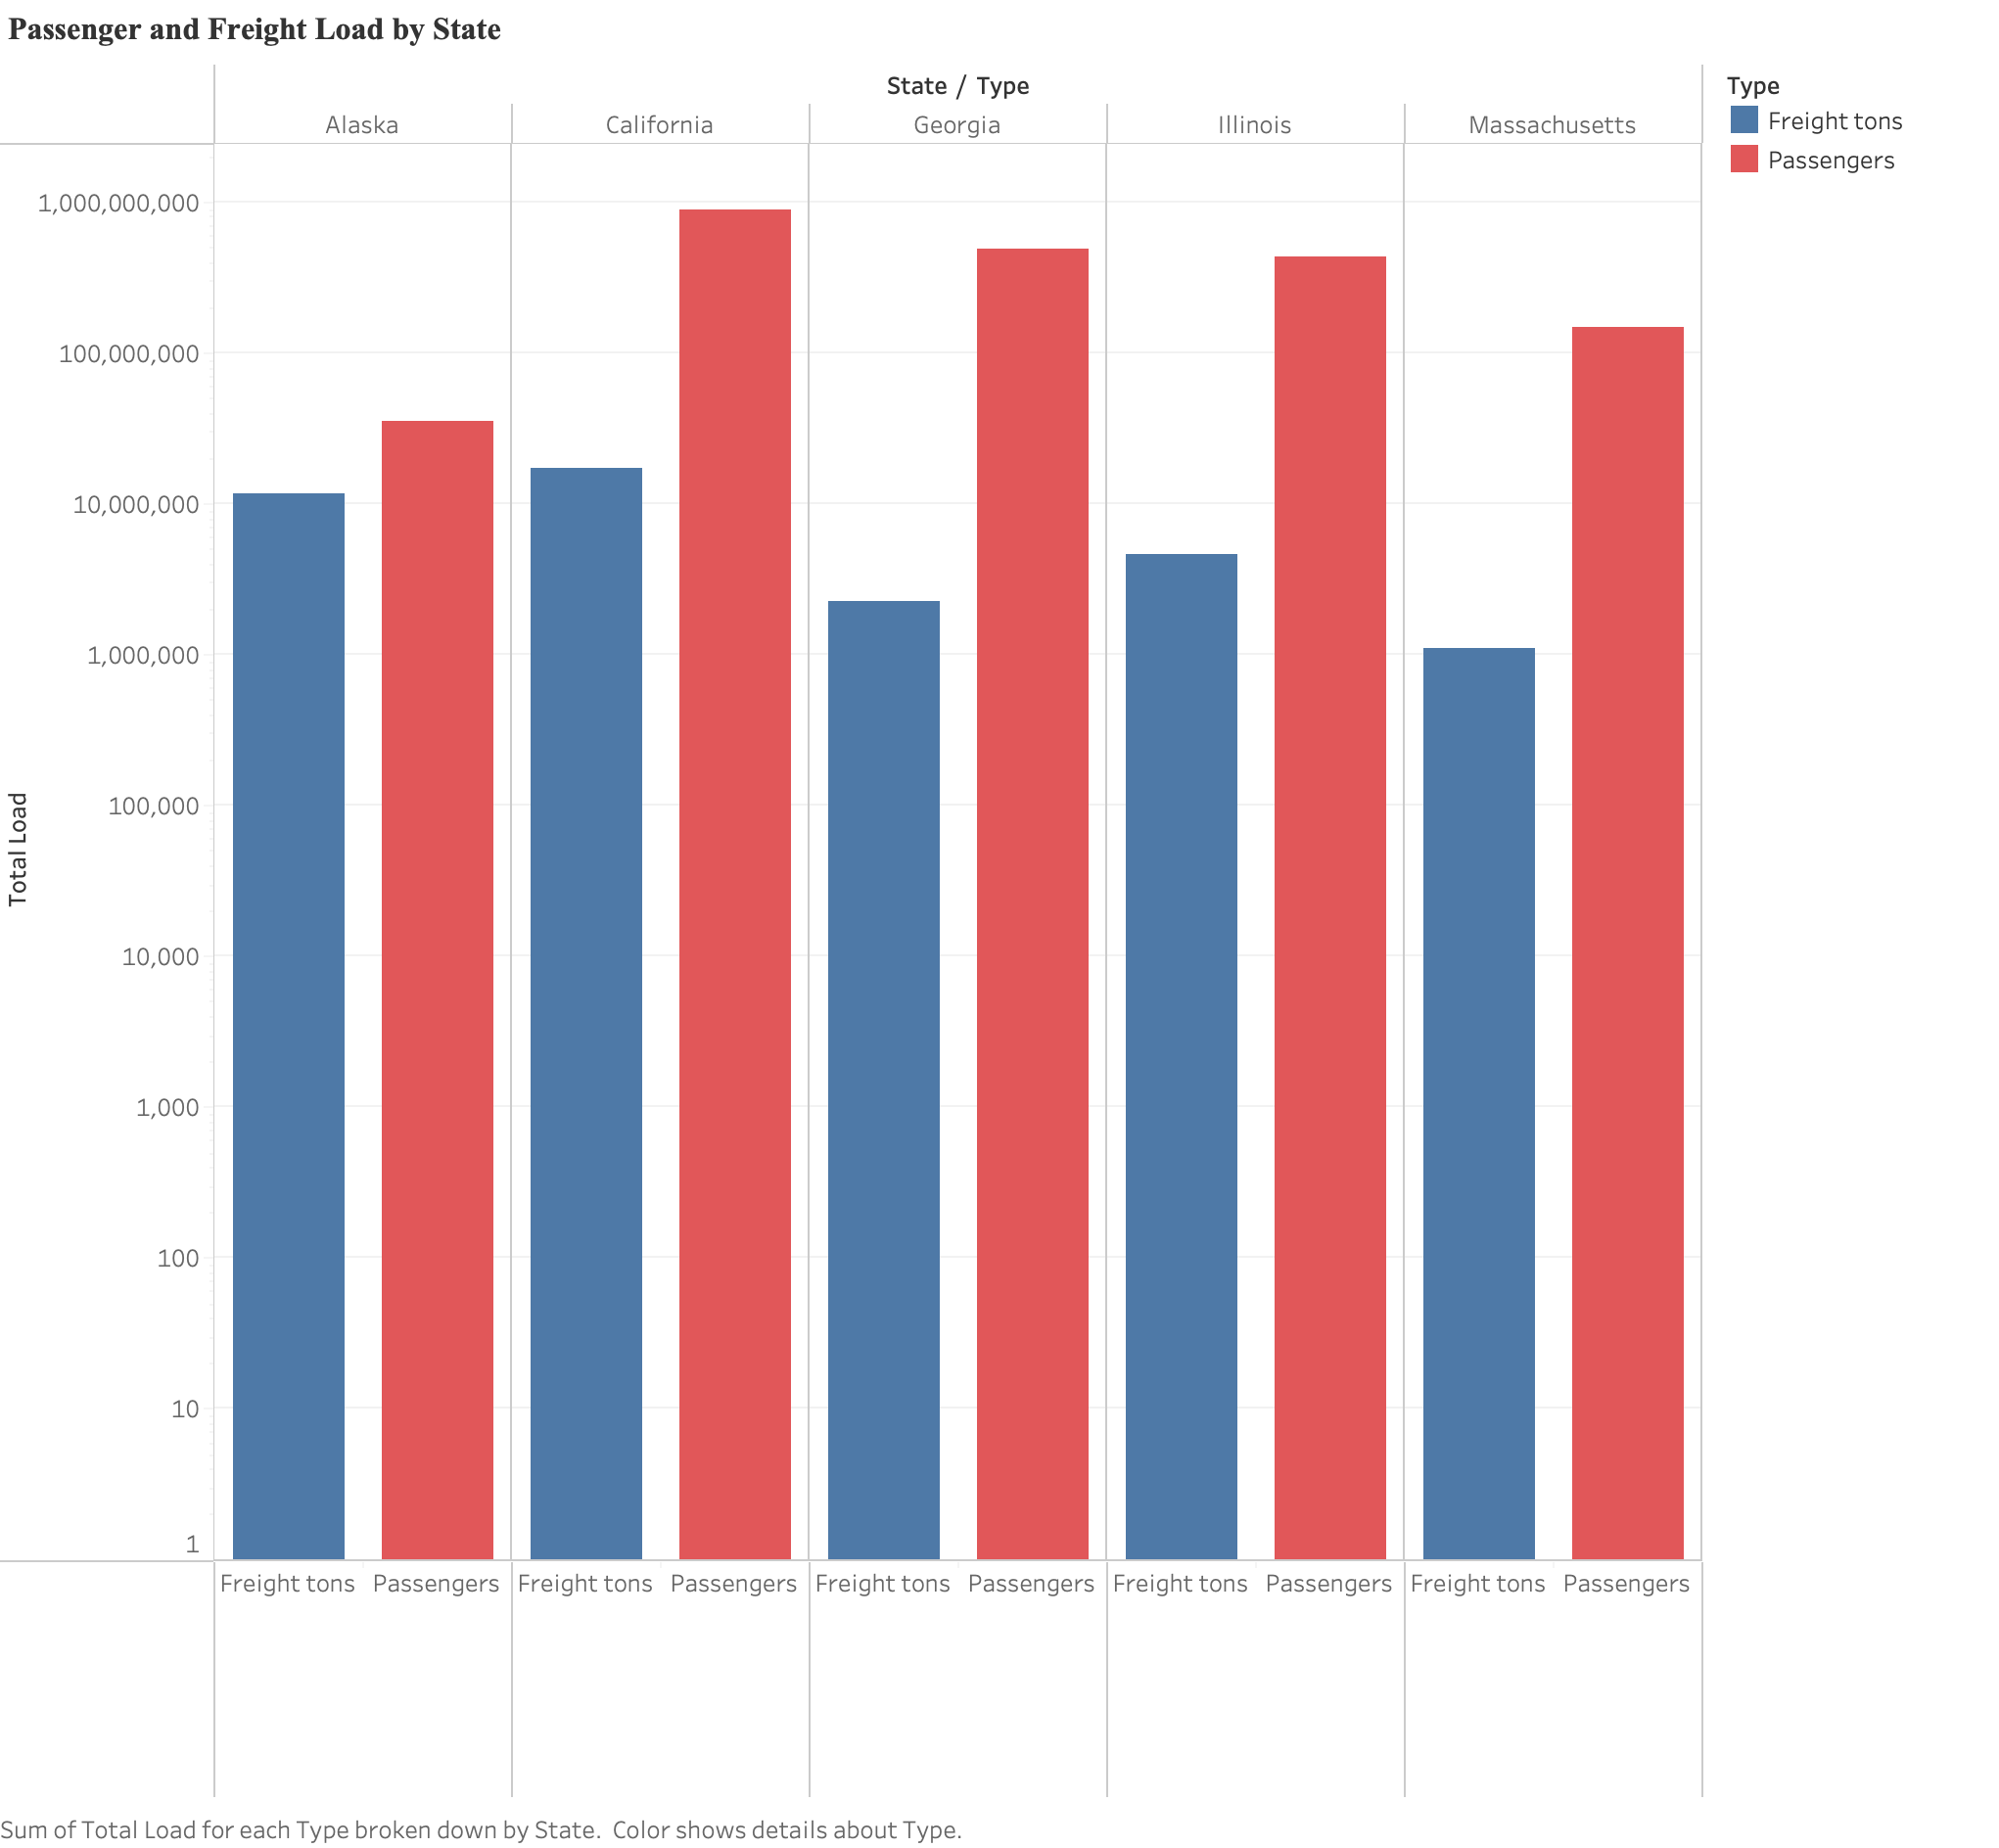

This graph shows the distribution of passenger and freight loads across five U.S. states from 2012 to 2022. California dominates with 887 million passengers and 17 million tons of freight, emphasizing its role as a major air travel and logistics hub. Georgia follows in passenger traffic with 491 million, while Alaska, with 11.7 million tons of freight, relies heavily on air freight due to its remote geography. Illinois and Massachusetts show untapped potential in freight operations.

Airline companies should prioritize expanding passenger handling infrastructure in California and optimizing unused cargo space in Georgia. Alaska may require investments in freight facilities and partnerships with logistics companies to strengthen its role in air cargo. Illinois and Massachusetts can explore niche freight markets, targeting specific industries. Across all states, airline companies should focus on sustainability and building e-commerce partnerships to meet evolving demands, ensuring growth and competitiveness in both passenger and freight services.

**Question 2:** What is the trend in freight handled over the decade? What was the impact of Covid-19 on the movement of freight?

In [ ]:
%%bigquery --project ba775-b04
SELECT Year, SUM(`Measure Values`) AS Total_Load
FROM `ba775-b04.TeamAssignment.combined_usa_dataset`
WHERE Year BETWEEN 2012 AND 2022
AND `Measure Names` = 'Freight tons'
GROUP BY Year
ORDER BY Year ASC;

Query is running:   0%|          |

Downloading:   0%|          |

,Year,Total_Load
0,2012,2751536
1,2013,2689319
2,2014,2759920
3,2015,2788856
4,2016,2967206
5,2017,3350941
6,2018,3696572
7,2019,3741974
8,2020,4320113
9,2021,4708313


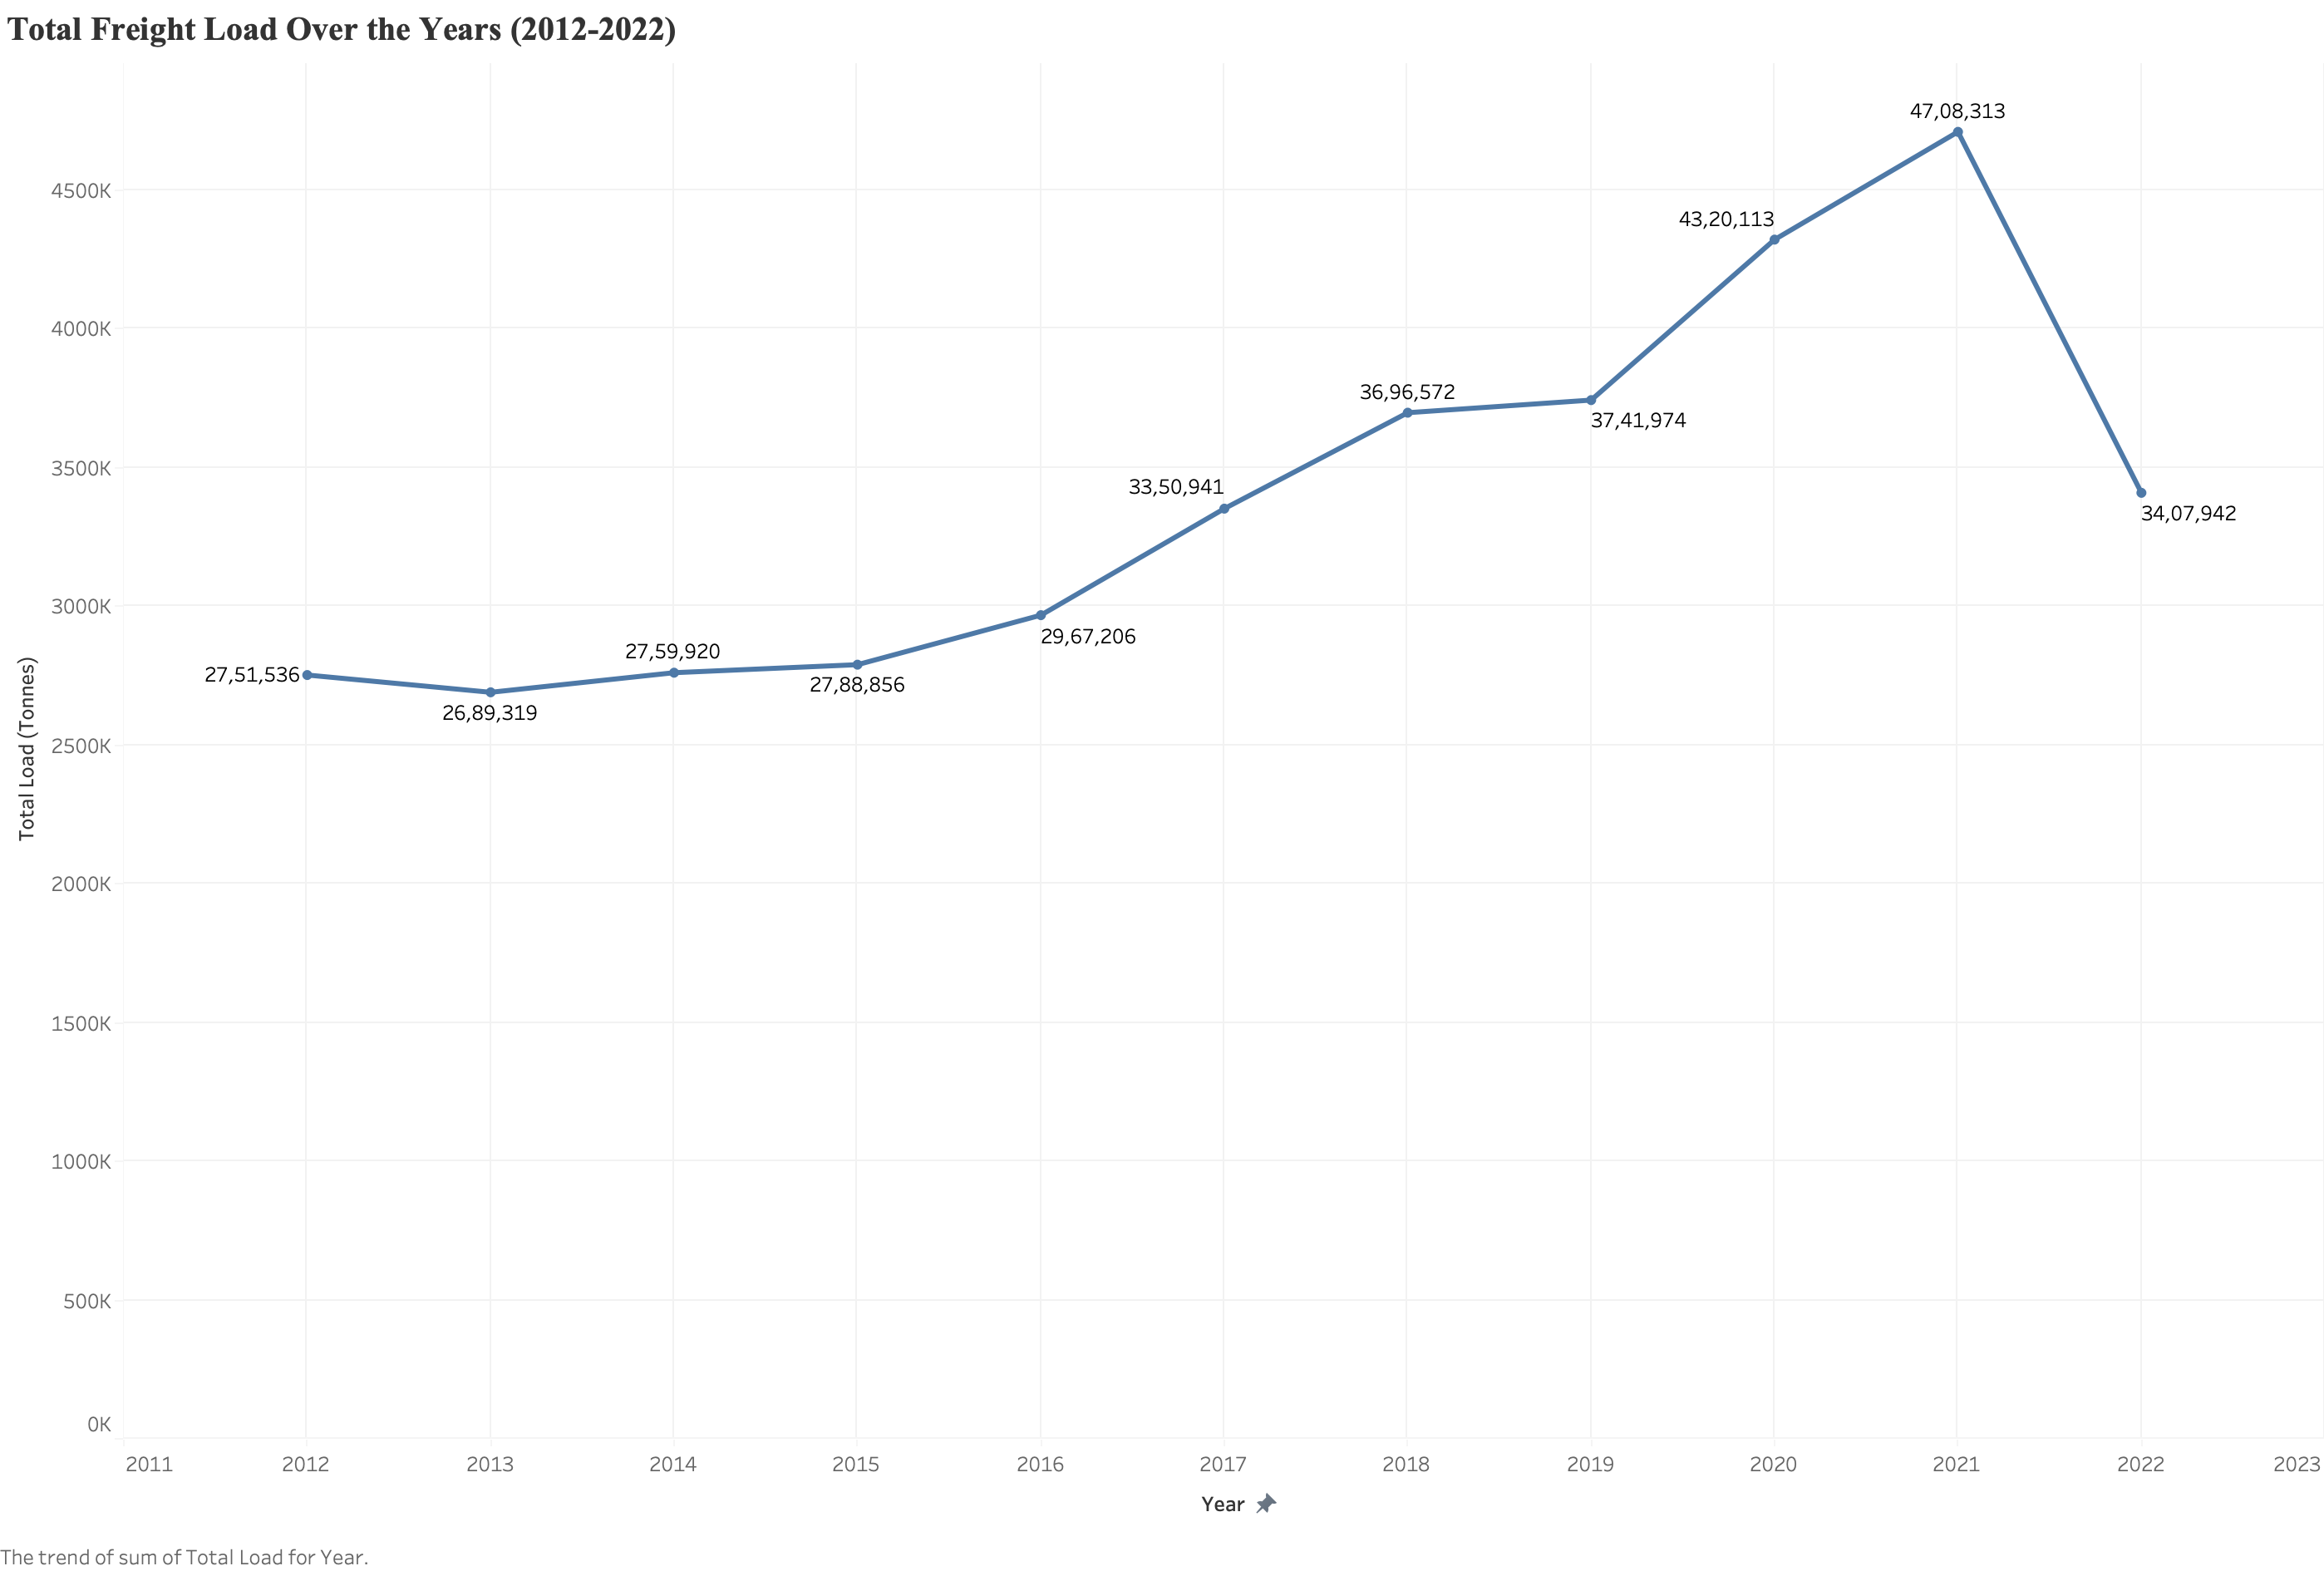

The graph above shows a steady increase in air freight tons from 2012 to 2022, with a significant surge during the COVID-19 pandemic years (2020–2021). Freight loads increased from 3.7 million tons in 2019 to 4.3 million in 2020, reaching a peak of 4.7 million in 2021. This reflects heightened demand for air freight driven by global supply chain disruptions, increased e-commerce activity, and urgent transportation of medical supplies during the pandemic.

As demand declines after the pandemic, airline companies should diversify their freight portfolios by targeting industries that benefit from expedited shipping, such as e-commerce, pharmaceuticals, and high-value goods. Investing in scalable systems and digital tools will enhance their ability to handle sudden spikes in demand, ensuring operational flexibility during future crises. Airline companies should also strengthen collaborations with logistics providers and e-commerce platforms to capitalize on long-term growth opportunities. By adapting operations and fostering industry partnerships, airlines can enhance their stability in freight operations.

# **10. Challenges**

One of the key challenges we faced was ensuring the clarity and relevance of our visualizations. Balancing the complexity of the data with the need for simplicity required us to carefully limit the number of data points and focus on clean, interpretable designs. Striking this balance was crucial to avoid visual clutter while still presenting actionable insights to our audience.  Another significant hurdle emerged in the initial stages of data preparation when we struggled to combine datasets from two different sources.

These datasets had varying structures and scopes, making integration difficult. Additionally, inconsistencies in data formatting and encoding posed a challenge, requiring extra effort to ensure that the data was correctly standardised before analysis. Finally, working with SQL queries for large datasets required optimisation and debugging to handle complex joins and aggregate calculations effectively.

# **11.Tableau Dashboard**


###**11-1. International Aviation Industry Report**


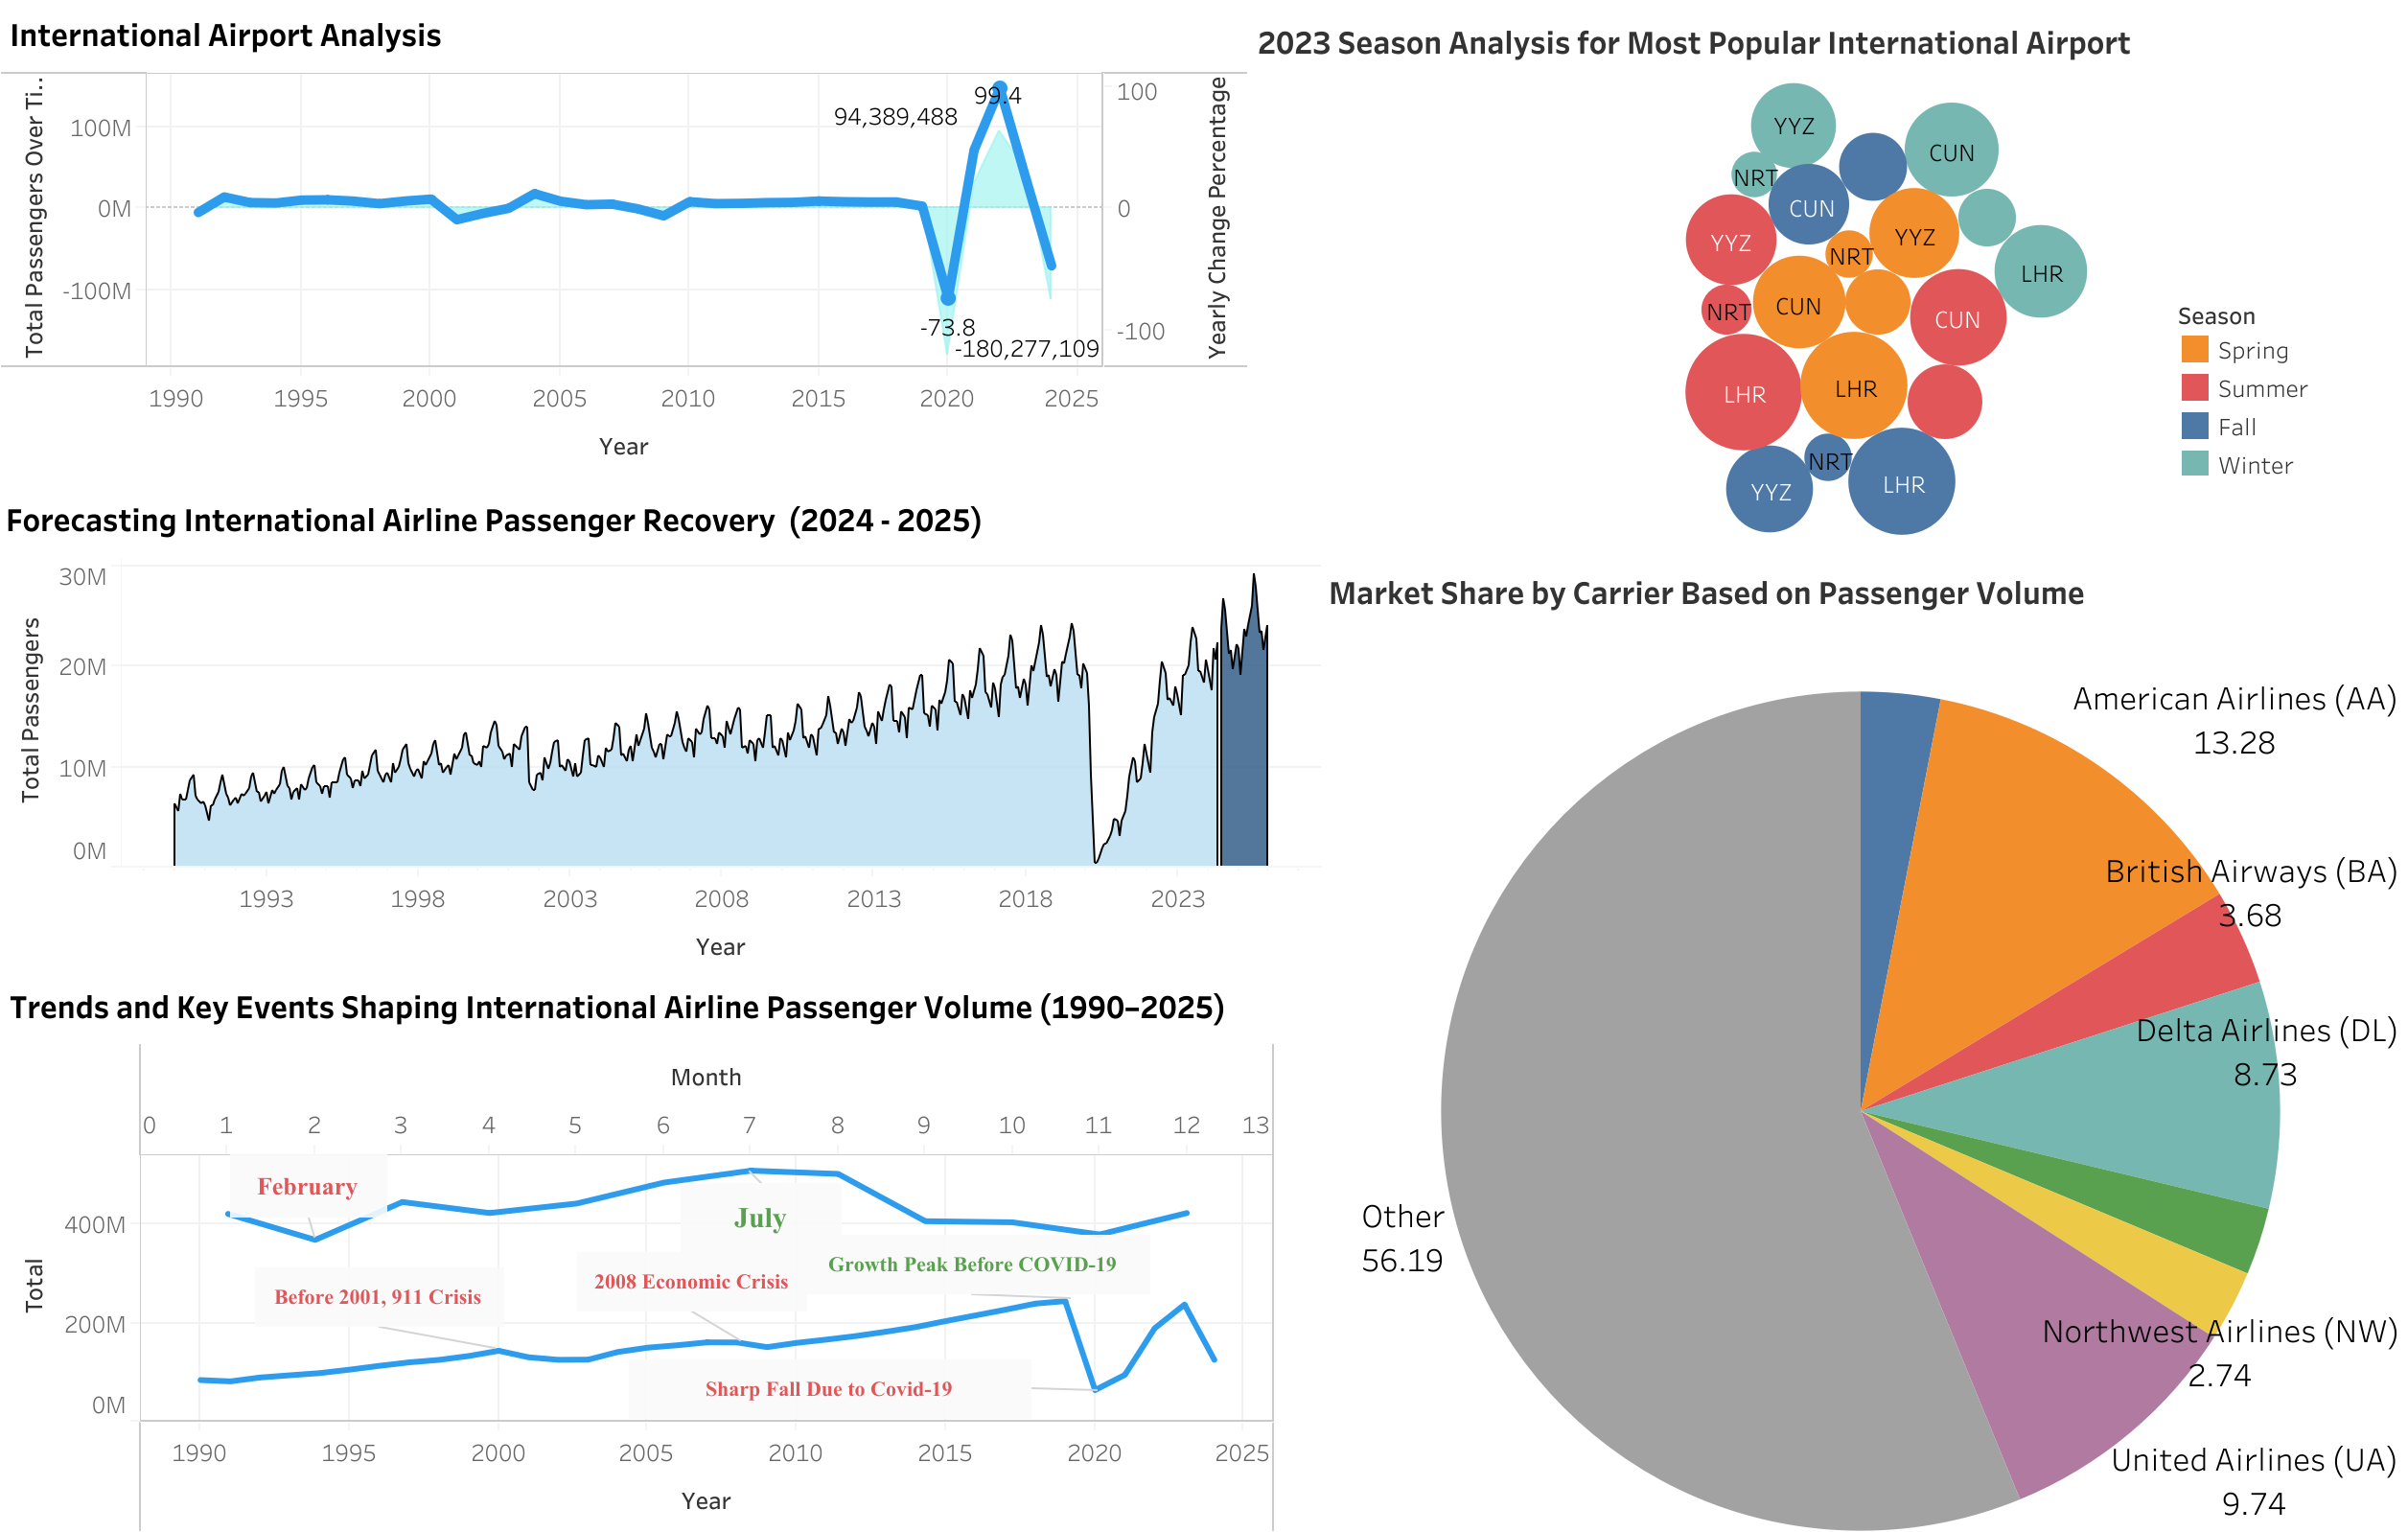

Our Tableau dashboard provides a comprehensive visualization of international airline passenger trends, highlighting key historical events and seasonal patterns that have shaped the industry. The first section tracks total passenger volumes over time, showcasing the impact of major global disruptions such as the 9/11 attacks, the 2008 economic crisis, and the COVID-19 pandemic. These events caused significant declines in passenger numbers, with COVID-19 being the most severe, leading to a 73.8% drop in volumes. However, the forecast indicates a steady recovery, with projections suggesting that by July 2024, international airline passenger volumes will return to pre-pandemic levels. This recovery reflects the resilience of the industry and growing consumer confidence in global air travel.

The dashboard also explores seasonal trends, dividing the year into four distinct periods: Winter, Spring, Summer, and Fall. Analysis of monthly passenger volumes reveals February as the cold season, characterized by lower travel demand due to weather, tax season, and fewer holidays. Conversely, July stands out as the hot season, with peak volumes driven by vacations, family trips, and leisure travel. By visualizing these trends, the dashboard helps identify opportunities for airlines to align their capacity and marketing strategies with seasonal demand, such as offering targeted promotions during the low-demand winter months or optimizing resources during the busy summer season.

Finally, the dashboard provides insights into carrier market share and recovery trends. Leading carriers like American Airlines and Delta Airlines dominate the market, while smaller airlines collectively account for over 50% of passenger volumes. This underscores the competitive nature of the industry and the need for strategic differentiation. The recovery projection further emphasizes the importance of preparing for increased passenger demand, with actionable insights for capacity planning, digital innovation, and sustainability efforts. Together, these visualizations provide a holistic view of the international airline industry, enabling stakeholders to make data-driven decisions and capitalize on emerging growth opportunities.

https://public.tableau.com/app/profile/junhan.chen7027/viz/BA775B04InternationalAirportAnalysis20243nd/Dashboard1?publish=yes

# **12. Conclusion**

This project offers a comprehensive analysis of international air travel patterns, delving into passenger trends, market share dynamics, freight operations, and seasonal fluctuations. The findings reveal a steady increase in passenger volumes over three decades, disrupted by major global events such as the 9/11 attacks, the 2008 financial crisis, and the COVID-19 pandemic. Notably, the pandemic caused a record decline in passenger volumes, but freight operations surged, underscoring their critical role during crises.

Seasonal analysis highlighted significant volume peaks in Q2 and Q3, with top routes like JFK-LHR consistently dominating due to transatlantic demand. The analysis also identified regional leaders, with California leading in passenger and freight volumes and Alaska emerging as a strategic freight hub. Market share analysis showed a competitive landscape, with American Airlines (AA) and British Airways (BA) leading on international routes, yet significant opportunities exist for other carriers to capture emerging demand on secondary routes. The integration of datasets from diverse sources posed initial challenges, especially due to structural inconsistencies and encoding issues, but leveraging airport codes as a common identifier facilitated seamless data merging. Visualization development required balancing data complexity with clarity to ensure actionable insights were effectively communicated.

The findings suggest that airlines should focus on optimizing high-demand routes like JFK-LHR while exploring growth opportunities in transpacific connections from West Coast hubs such as LAX and SFO. Seasonal peaks demand dynamic resource allocation during summer and winter to align with demand surges and maximize operational efficiency. Expanding freight operations is essential for mitigating risks associated with passenger travel downturns, especially by leveraging Alaska’s strategic freight potential. Enhancing competitive positioning on underserved routes and leveraging customer preferences can further bolster market share. Finally, adopting data-driven strategies to analyze trends and anticipate disruptions will ensure resilience and long-term growth in the evolving aviation landscape.


# **13. References**

**9/11 Attacks**: Blunk, S., Clark, D., & McGibany, J. (2006). Evaluating the long-run impacts of the 9/11 terrorist attacks on US domestic airline travel. Applied Economics, 38(4), 363-370.
https://www.tandfonline.com/doi/abs/10.1080/00036840500367930

**Great Recession** :
Suau-Sanchez, P., Voltes-Dorta, A., & Cuguero-Escofet, N. (2020). An early assessment of the impact of COVID-19 on air transport: Just another crisis or the end of aviation as we know it? Journal of Transport Geography, 86, 102749.
https://www.sciencedirect.com/science/article/pii/S0966692320304841?via%3Dihub

**COVID-19 Pandemic** :
Sobieralski, J. B. (2020). COVID-19 and airline employment: Insights from historical uncertainty shocks to the industry. Transportation Research Interdisciplinary Perspectives, 5, 100123.
https://www.sciencedirect.com/science/article/pii/S2590198220300348?via%3Dihub

**Data Source :** Bureau of Transportation Statistics, U.S. Department of Transportation (https://www.bts.gov/browse-statistical-products-and-data/state-transportation-statistics/us-airline-traffic-airport)
**Data Source:** Bureau of Transportation Statistics, U.S. Department of Transportation (https://data.transportation.gov/Aviation/International_Report_Passengers/xgub-n9bw/about_data)

**International Air Transport Association (IATA)**
International Air Transport Association. (2021). Air passenger market analysis. Retrieved from https://www.iata.org/en/iata-repository/publications/economic-reports/air-passenger-monthly-analysis---december-2020/

**Delta Air Lines**
Delta Air Lines. (2021). Delta Air Lines announces December quarter and full year 2021 financial results. Retrieved from https://ir.delta.com/news/news-details/2022/Delta-Air-Lines-Announces-December-Quarter-and-Full-Year-2021-Financial-Results/default.aspx

**Qatar Airways**
Qatar Airways. (2021). Qatar Airways Group releases its 2020/21 annual report. Retrieved from https://www.qatarairways.com/press-releases/en-WW/215412-qatar-airways-group-releases-its-2020-21-annual-report

**Singapore Airlines**
Singapore Airlines. (2021). Annual report FY2020/21. Retrieved from https://www.singaporeair.com/saar5/pdf/Investor-Relations/Annual-Report/annualreport202021.pdf

**International Air Transport Association (IATA) Load Factor Data**
International Air Transport Association. (2021). Air passenger market analysis. Retrieved from https://www.iata.org/en/iata-repository/publications/economic-reports/air-passenger-monthly-analysis---december-2020/

# **14. Generative AI Disclosure Statement**

In completing this project, we have utilized Generative AI tools to assist with various aspects of our work. Below is a detailed account of how these tools were used:

**Content Generation:** We used ChatGPT to brainstorm ideas and structure the initial outline of the project. The AI helped us refine our thesis statement and suggested key points to include in each section.

**Graph syntax and suggestions:** Utilized ChatGPT and Gemini to suggest interesting graphs. Modified suggestions accordingly and utilized only the code syntax/library.

**Paraphrasing and refinement:** Utilized ChatGPT to better write the ideas behind the analysis, critique and correct the written content

Our team has reviewed, edited, and validated all AI-generated content to ensure its accuracy, relevance, and originality in accordance with academic integrity guidelines.